In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/michaelbenmergui/Documents/Gioia/PycharmProjects/data-wizard-gioia/Riskified_home_assignment/riskified_ds_home_task_dataset_(3).csv')

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/387486256.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/michaelbenmergui/Documents/Gioia/PycharmProjects/data-wizard-gioia/Riskified_home_assignment/riskified_ds_home_task_dataset_(3).csv')


In [3]:
df.head(20)

,order_id,status,email_anoni,billing_country_code,shipping_country_code,shipping_method,created_at,total_spent,currency_code,gateway,...,V2_distance,V3_distance,V4_our_age,V5_merchant_age,V6_avs_result,V7_bill_ship_name_match,V8_ip,V9_cookie,V10_cookie,V11_cookie
0,176079577,approved,shRbsUOPGM@qq.com,CA,CA,value_1620,2017-04-06,758.471274,CAD,value_100,...,NaN,NaN,618.0,1.0,Unsupported,FL,0.0,0.0,3.767404,NaN
1,201560820,approved,hEjasTK8Vpq6sR@gmail.com,IT,IT,value_1639,2017-06-16,48.319175,EUR,value_169,...,2.0,2.0,0.0,0.0,Missing,FL,0.0,0.0,0.464798,NaN
2,164072492,approved,KOWpxkDYDF@gmail.com,BE,BE,value_244,2017-03-01,1123.094534,EUR,value_151,...,107.0,92.0,1149.0,1437.0,Missing,FL,0.0,1.0,1.258080,0.038704
3,174595495,approved,hKOMNS3@me.com,CH,CH,value_1879,2017-04-02,12.530000,USD,value_247,...,1.0,1.0,169.0,72.0,Missing,FL,0.0,10.0,0.481779,0.008171
4,213517818,approved,PrP6SYm5Q5nMs1tj@hotmail.com,HK,HK,value_291,2017-07-11,480.000000,USD,value_148,...,1.0,1.0,806.0,519.0,Unsupported,FL,0.0,211.0,1.475766,96.343843
5,126406435,approved,J2u1gjQOvtu4kB@shaw.ca,CA,CA,value_45,2016-11-18,92.000000,USD,value_169,...,NaN,NaN,29.0,2.0,Missing,FL,0.0,0.0,4.450500,NaN
6,166642890,approved,45ydoA86WDC6@rogers.com,CA,CA,value_147,2017-03-07,265.840000,USD,value_120,...,NaN,NaN,396.0,396.0,Full Match,FL,NaN,0.0,4.548105,NaN
7,137661578,approved,BcYU4wi1Ma@hotmail.com,CA,CA,value_586,2016-12-13,226.039204,CAD,value_21,...,17.0,17.0,123.0,0.0,Full Match,FL,0.0,16.0,15.194346,87.744757
8,214799120,approved,RJvPHoSV6KUqy6ZURd@gmail.com,LT,LT,value_1938,2017-07-14,169.000000,USD,value_21,...,NaN,NaN,0.0,1.0,Unsupported,FL,0.0,19.0,0.367352,286.887303
9,114576986,approved,t5LFxKZAw7YdcXzj@hotmail.com,CA,CA,value_1142,2016-10-20,74.950000,USD,value_169,...,306.0,306.0,2904.0,0.0,Missing,FL,0.0,0.0,10.810811,NaN


In [4]:
df.shape, df.drop_duplicates().shape

((190000, 21), (190000, 21))

In [5]:
df.isna().sum()/df.shape[0]

order_id                   0.000000
status                     0.000000
email_anoni                0.000000
billing_country_code       0.004089
shipping_country_code      0.001468
shipping_method            0.023889
created_at                 0.000000
total_spent                0.000000
currency_code              0.000000
gateway                    0.000726
V1_link                    0.000037
V2_distance                0.168611
V3_distance                0.163384
V4_our_age                 0.000037
V5_merchant_age            0.000037
V6_avs_result              0.000037
V7_bill_ship_name_match    0.000037
V8_ip                      0.025621
V9_cookie                  0.000968
V10_cookie                 0.009747
V11_cookie                 0.414237
dtype: float64

Missing values: we can see that we have features with 16% of missing values like v2 and v3 distance, and features like v11 that has 41% of missing values.

In [6]:
# check status distribution: 87% approved, 2% chargeback, 10% blocked
df.groupby(['status'])['order_id'].nunique()/df.groupby(['status'])['order_id'].nunique().sum()

status
approved      0.874921
chargeback    0.019345
declined      0.105734
Name: order_id, dtype: float64

In [7]:
# check missing values per status category
# df[df.status=='approved'].isna().sum()/df[df.status=='approved'].shape[0]
df[df.status=='chargeback'].isna().sum()/df[df.status=='chargeback'].shape[0]
# df[df.status=='declined'].isna().sum()/df[df.status=='declined'].shape[0]

order_id                   0.000000
status                     0.000000
email_anoni                0.000000
billing_country_code       0.001535
shipping_country_code      0.002852
shipping_method            0.170651
created_at                 0.000000
total_spent                0.000000
currency_code              0.000000
gateway                    0.002193
V1_link                    0.000219
V2_distance                0.151349
V3_distance                0.146523
V4_our_age                 0.000219
V5_merchant_age            0.000219
V6_avs_result              0.000219
V7_bill_ship_name_match    0.000219
V8_ip                      0.016451
V9_cookie                  0.003071
V10_cookie                 0.028954
V11_cookie                 0.260364
dtype: float64

In [8]:
# number of status per order
df.groupby(['order_id'])['status'].nunique()

order_id
21793269     1
31586423     1
42498126     1
48941294     1
48951378     1
            ..
216084232    1
216084263    1
216085165    1
216085945    1
216086170    1
Name: status, Length: 189041, dtype: int64

# 1. Provide the sales team with some examples of risky segments in the population and segments with sub-optimal performance (e.g. segments where they could safely approve more than they currently are). Create 3 informative plots that demonstrate your findings. These plots can also include any additional findings/insights you come across and wish to showcase.

## Provide the sales team with some examples of risky segments in the population

In [9]:
# EDA
df.order_id.nunique()

189041

In [10]:
order_id_value_count = pd.DataFrame(df.order_id.value_counts().reset_index())
order_id_value_count.columns = ['order_id', 'value_count']
order_id_value_count.groupby(['value_count'])['order_id'].nunique()/order_id_value_count.groupby(['value_count'])['order_id'].nunique().sum()
order_id_value_count.groupby(['value_count'])['order_id'].nunique()

value_count
1    188088
2       947
3         6
Name: order_id, dtype: int64

In [11]:
order_id_value_count.groupby(['value_count'])['order_id'].nunique().sum()

189041

we have 189,041 unique order_id's. we indeed have some order_id's that appear more than 1 time. 99% of them appear 1 time. 947 order_id's appear twice, 6 order_id's appear 3 times. is this normal? let's look at these order_id's.

In [12]:
df[df.order_id.isin(list(order_id_value_count.order_id[order_id_value_count.value_count > 1]))]

,order_id,status,email_anoni,billing_country_code,shipping_country_code,shipping_method,created_at,total_spent,currency_code,gateway,...,V2_distance,V3_distance,V4_our_age,V5_merchant_age,V6_avs_result,V7_bill_ship_name_match,V8_ip,V9_cookie,V10_cookie,V11_cookie
2840,196087542,approved,gYKl5PQ4cFHO77@icloud.com,GB,GB,value_291,2017-05-31,940.966592,GBP,value_148,...,1829.0,1829.0,0.0,2.0,Unsupported,FL,0.0,37.0,3.657740,2.877164
5269,102845635,approved,I7NEYgewEfcT2fh@gmail.com,SA,US,value_2339,2016-09-10,2420.000000,USD,value_181,...,13312.0,0.0,1223.0,1708.0,Unsupported,FL,0.0,128.0,21.621622,876.960093
5529,103689621,approved,zJl2xoz7@wanadoo.fr,FR,FR,value_1609,2016-09-13,406.850779,EUR,value_4,...,11.0,11.0,2217.0,1390.0,Missing,FL,0.0,55.0,0.390016,250.164352
8047,103182564,approved,wn3lZLeJ@163.com,US,CN,value_2337,2016-09-11,160.000000,USD,value_181,...,15.0,11160.0,0.0,15.0,Unsupported,NO_MATCH,0.0,13.0,49.791691,11.119850
9464,109956425,approved,r4UtMiyL@btinternet.com,GB,GB,value_291,2016-10-04,99.000000,USD,value_43,...,23.0,23.0,2235.0,1.0,Full Match,FL,0.0,0.0,3.738318,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189987,191111295,chargeback,ea4mHH5LKL@gmail.com,FR,FR,value_291,2017-05-17,122.757034,EUR,value_148,...,293.0,293.0,91.0,0.0,Unsupported,FL,0.0,3.0,14.186499,0.003993
189991,177287938,chargeback,ZRHMfEEwtb@aol.com,FI,FI,value_1609,2017-04-10,439.563462,EUR,value_4,...,75.0,75.0,0.0,0.0,Missing,FL,0.0,12.0,1.175620,0.094792
189995,162872228,chargeback,WWLJCwikCM9cO@hotmail.com,BR,BR,value_1301,2017-02-25,563.097864,BRL,value_4,...,127.0,127.0,2356.0,0.0,Unsupported,FL,0.0,1.0,30.698267,0.007838
189996,161239027,chargeback,awdtDptP@hotmail.com,BR,BR,value_1301,2017-02-20,555.310034,BRL,value_4,...,384.0,384.0,2976.0,0.0,Unsupported,FL,0.0,1.0,30.658170,0.011229


I see all the parameters are equal apart from the email. Since the email address name is uninformative, I'm gonna extract the email domain between :@" and "."

In [13]:
import re

def extract_domain(email):
    # Update the regex to include hyphens in the domain name
    match = re.search(r'@([\w-]+)\.', email)
    return match.group(1) if match else None

df['email_domain'] = df['email_anoni'].apply(extract_domain)

In [14]:
df.shape

(190000, 22)

we can see that the emails that are present more than 1 time are emails with a personal_domain. how many order_id do we have coming from each email?

In [15]:
df.groupby(['email_anoni'])['order_id'].nunique()

email_anoni
002NRHpmQ07@gmail.com                 1
002nRtrqGdUNjnC@gmail.com             1
003eFR0@personal_domain.com           1
00ApRTeCuJCoctH4@gmail.com            1
00CBcKKcWm1ncw0@yahoo.com             1
                                     ..
zzx2mATksuPknYFd1@icloud.com          1
zzxTXpa1JZuxGcMcCkfN@yahoo.co.jp      1
zzyTBwrgvB@hotmail.com                1
zzyTyVT89LG2s@personal_domain.com     1
zzzoitSKbkxejd@personal_domain.com    1
Name: order_id, Length: 189946, dtype: int64

so on one side we have multiple order_id's coming from the same email_address. on the other side we have the same order_id coming from 2 different email addresses. the first scenario looks plausible - when a user does multiple orders. the second scenario looks less common - as we should have different order_id's for different emails.

In [16]:
same_orderid_diff_email = df[df.order_id.isin(list(order_id_value_count.order_id[order_id_value_count.value_count > 1]))]

In [17]:
same_orderid_diff_email

,order_id,status,email_anoni,billing_country_code,shipping_country_code,shipping_method,created_at,total_spent,currency_code,gateway,...,V3_distance,V4_our_age,V5_merchant_age,V6_avs_result,V7_bill_ship_name_match,V8_ip,V9_cookie,V10_cookie,V11_cookie,email_domain
2840,196087542,approved,gYKl5PQ4cFHO77@icloud.com,GB,GB,value_291,2017-05-31,940.966592,GBP,value_148,...,1829.0,0.0,2.0,Unsupported,FL,0.0,37.0,3.657740,2.877164,icloud
5269,102845635,approved,I7NEYgewEfcT2fh@gmail.com,SA,US,value_2339,2016-09-10,2420.000000,USD,value_181,...,0.0,1223.0,1708.0,Unsupported,FL,0.0,128.0,21.621622,876.960093,gmail
5529,103689621,approved,zJl2xoz7@wanadoo.fr,FR,FR,value_1609,2016-09-13,406.850779,EUR,value_4,...,11.0,2217.0,1390.0,Missing,FL,0.0,55.0,0.390016,250.164352,wanadoo
8047,103182564,approved,wn3lZLeJ@163.com,US,CN,value_2337,2016-09-11,160.000000,USD,value_181,...,11160.0,0.0,15.0,Unsupported,NO_MATCH,0.0,13.0,49.791691,11.119850,163
9464,109956425,approved,r4UtMiyL@btinternet.com,GB,GB,value_291,2016-10-04,99.000000,USD,value_43,...,23.0,2235.0,1.0,Full Match,FL,0.0,0.0,3.738318,NaN,btinternet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189987,191111295,chargeback,ea4mHH5LKL@gmail.com,FR,FR,value_291,2017-05-17,122.757034,EUR,value_148,...,293.0,91.0,0.0,Unsupported,FL,0.0,3.0,14.186499,0.003993,gmail
189991,177287938,chargeback,ZRHMfEEwtb@aol.com,FI,FI,value_1609,2017-04-10,439.563462,EUR,value_4,...,75.0,0.0,0.0,Missing,FL,0.0,12.0,1.175620,0.094792,aol
189995,162872228,chargeback,WWLJCwikCM9cO@hotmail.com,BR,BR,value_1301,2017-02-25,563.097864,BRL,value_4,...,127.0,2356.0,0.0,Unsupported,FL,0.0,1.0,30.698267,0.007838,hotmail
189996,161239027,chargeback,awdtDptP@hotmail.com,BR,BR,value_1301,2017-02-20,555.310034,BRL,value_4,...,384.0,2976.0,0.0,Unsupported,FL,0.0,1.0,30.658170,0.011229,hotmail


In [18]:
# we have the same order_id coming from more than 1 email address. let's see what's their status

# does each order_id have multiple status?
same_orderid_diff_email.groupby(['order_id'], as_index=False, dropna=False)['status'].nunique() # yes each order_id, even if connected to different emails, has 1 unique status

status_distribution_multiple_email_addresses = same_orderid_diff_email.groupby(['status'], as_index=False, dropna=False)['order_id'].nunique()

status_distribution_multiple_email_addresses['percentage'] = (status_distribution_multiple_email_addresses['order_id']/status_distribution_multiple_email_addresses['order_id'].sum())*100


In [19]:
status_distribution_multiple_email_addresses

,status,order_id,percentage
0,approved,45,4.721931
1,chargeback,896,94.018888
2,declined,12,1.259182


94% of order_id's that come from more than 1 different email addresses are approved fraudulent transactions. Let's plot

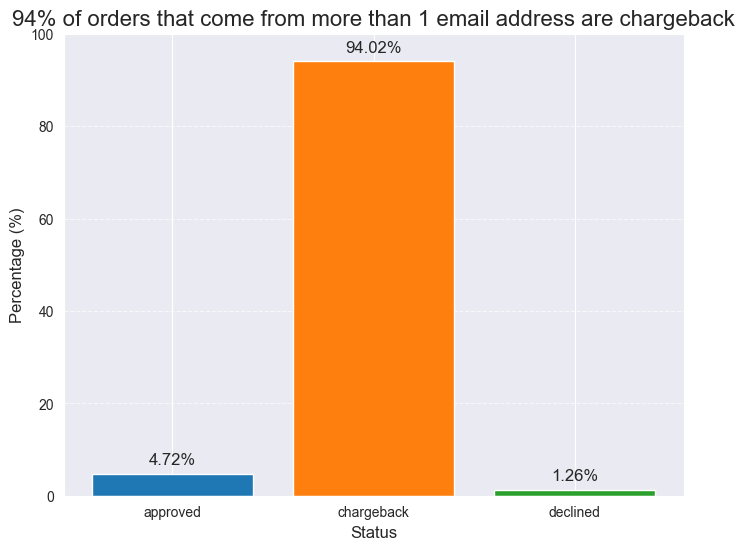

In [20]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(8, 6))
colors = plt.cm.tab10(range(len(status_distribution_multiple_email_addresses['status'])))
plt.bar(status_distribution_multiple_email_addresses['status'], status_distribution_multiple_email_addresses['percentage'], color=colors)
plt.title('94% of orders that come from more than 1 email address are chargeback', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)

# Annotate percentage values on bars
for i, v in enumerate(status_distribution_multiple_email_addresses['percentage']):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center', fontsize=12)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Save the plot as an image with a white background
plt.savefig('status_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()



I will add this feature to the df:
- number of distinct email addresses per order_id

In [21]:
num_email_addresses_per_order_id = df.groupby(['order_id'], as_index=False)['email_anoni'].nunique()
num_email_addresses_per_order_id.columns = ['order_id','email_address_count']
df = pd.merge(df, num_email_addresses_per_order_id, how='left', on=['order_id'])

In [22]:
# for those order_id's that belong to more than 1 different email address, let's see what's the domain distribution

same_orderid_diff_email.groupby(['email_domain'])['order_id'].nunique()/same_orderid_diff_email.groupby(['email_domain'])['order_id'].nunique().sum()

email_domain
126                0.001049
163                0.011542
AOL                0.002099
GMAIL              0.008395
HOTMAIL            0.007345
YAHOO              0.004197
aol                0.009444
btinternet         0.003148
gmail              0.420776
gmx                0.003148
hotmail            0.213012
icloud             0.007345
laposte            0.006296
libero             0.002099
live               0.009444
mac                0.001049
mail               0.001049
me                 0.004197
naver              0.004197
orange             0.003148
outlook            0.022036
personal_domain    0.128017
qq                 0.028332
sina               0.002099
t-online           0.002099
wanadoo            0.003148
web                0.003148
yahoo              0.084995
ymail              0.003148
Name: order_id, dtype: float64

out of those order_id's that belong to more than 1 different email addresses, 42% come from gmail, 21% from hotmail, 13% from personal_domain. email domain is the same for the different email addresses in this case:

In [23]:
same_orderid_diff_email.groupby(['order_id'])['email_domain'].nunique()

order_id
63548611     1
65044707     1
65159184     1
65653935     1
65794031     1
            ..
209027364    1
210206084    1
210808592    1
211286033    1
211407742    1
Name: email_domain, Length: 953, dtype: int64

In [24]:
# the email address shared by 30 order_id's is NA@personal_domain.com
df.groupby(['email_anoni'])['order_id'].nunique()

email_anoni
002NRHpmQ07@gmail.com                 1
002nRtrqGdUNjnC@gmail.com             1
003eFR0@personal_domain.com           1
00ApRTeCuJCoctH4@gmail.com            1
00CBcKKcWm1ncw0@yahoo.com             1
                                     ..
zzx2mATksuPknYFd1@icloud.com          1
zzxTXpa1JZuxGcMcCkfN@yahoo.co.jp      1
zzyTBwrgvB@hotmail.com                1
zzyTyVT89LG2s@personal_domain.com     1
zzzoitSKbkxejd@personal_domain.com    1
Name: order_id, Length: 189946, dtype: int64

In [25]:
# let's see what's the status distribution for this email address
df[df['email_anoni']=='NA@personal_domain.com'].groupby(['status'])['order_id'].nunique()/df[df['email_anoni']=='NA@personal_domain.com'].groupby(['status'])['order_id'].nunique().sum()

status
approved      0.533333
chargeback    0.066667
declined      0.400000
Name: order_id, dtype: float64

it seems like for this address we have 53% of approved legitimate transactions and 40% of declines transactions, but only 6% chargeback.

In [26]:
# extract year, month (season), day of week (weekday/weekend)
# Convert the 'date' column to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract year
df['year'] = df['created_at'].dt.year

# Extract month and map to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['month'] = df['created_at'].dt.month
df['season'] = df['month'].apply(get_season)

# Extract day of the week and categorize as weekday/weekend
df['day_of_week'] = df['created_at'].dt.day_name()
df['is_weekend'] = df['created_at'].dt.dayofweek >= 5

In [27]:
df[df['email_anoni']=='NA@personal_domain.com'].is_weekend.value_counts()/df[df['email_anoni']=='NA@personal_domain.com'].is_weekend.value_counts().sum()

is_weekend
False    0.766667
True     0.233333
Name: count, dtype: float64

it seems like NA@personal_domain.com are mostly active during the week.

In [28]:
# how many order_id's do we have per weekeday/season
df.groupby(['day_of_week'])['order_id'].nunique().std()/df.groupby(['day_of_week'])['order_id'].nunique().mean()
# we have a coefficient of variation of 12.5% between number of order_id's per weekday, meaning that each day of the week gets more or less the same portion of order_id's: there is not a day with more order_id's than others.

0.12517328599439054

In [29]:
# status distribution per weekday: in which day do we have the majority of chargebacks/approved/declined?

df.groupby(['day_of_week','status'])['order_id'].nunique()/df.groupby(['day_of_week'])['order_id'].nunique()

day_of_week  status    
Friday       approved      0.887393
             chargeback    0.018735
             declined      0.093871
Monday       approved      0.865141
             chargeback    0.019066
             declined      0.115792
Saturday     approved      0.877686
             chargeback    0.017986
             declined      0.104328
Sunday       approved      0.881817
             chargeback    0.018078
             declined      0.100105
Thursday     approved      0.883275
             chargeback    0.020838
             declined      0.095887
Tuesday      approved      0.865100
             chargeback    0.020498
             declined      0.114402
Wednesday    approved      0.862331
             chargeback    0.019645
             declined      0.118024
Name: order_id, dtype: float64

the distribution of status per weekday is quite constant: every day we have 86-88% of approved, around 2% chargeback and 10-11% of declined.

In [30]:
df.groupby(['status','day_of_week'])['order_id'].nunique()/df.groupby(['status'])['order_id'].nunique()

status      day_of_week
approved    Friday         0.165808
            Monday         0.142658
            Saturday       0.121260
            Sunday         0.122391
            Thursday       0.166582
            Tuesday        0.146213
            Wednesday      0.135088
chargeback  Friday         0.158326
            Monday         0.142193
            Saturday       0.112387
            Sunday         0.113481
            Thursday       0.177741
            Tuesday        0.156686
            Wednesday      0.139185
declined    Friday         0.145137
            Monday         0.157995
            Saturday       0.119272
            Sunday         0.114969
            Thursday       0.149640
            Tuesday        0.159996
            Wednesday      0.152992
Name: order_id, dtype: float64

the data suggests slight patterns in status behavior by day.

In [31]:
# let's see if season/month wise we have some pattern
df.groupby(['season','status'])['order_id'].nunique()/df.groupby(['season'])['order_id'].nunique()


season  status    
Fall    approved      0.912316
        chargeback    0.014098
        declined      0.073586
Spring  approved      0.859008
        chargeback    0.022104
        declined      0.118888
Summer  approved      0.877644
        chargeback    0.021363
        declined      0.100993
Winter  approved      0.858796
        chargeback    0.019704
        declined      0.121500
Name: order_id, dtype: float64

 season and month show stability as well.

In [32]:
# for each status, let's see what are the most common email domains
order_id_count_per_status_email_domain = (
    df.groupby(['status', 'email_domain'], as_index=False)['order_id']
    .nunique()
    .sort_values(by=['status', 'order_id'], ascending=[True, False])
)

# Get the top 3 email domains for each status
top_email_domains = (
    order_id_count_per_status_email_domain
    .groupby('status')
    .head(3)
    .reset_index(drop=True)
)

print(top_email_domains)


       status     email_domain  order_id
0    approved            gmail     64785
1    approved          hotmail     29125
2    approved  personal_domain     22815
3  chargeback            gmail      1395
4  chargeback          hotmail       688
5  chargeback            yahoo       514
6    declined            gmail      6643
7    declined  personal_domain      2986
8    declined            GMAIL      2084


In [33]:
# for each status and email_anoni, what's the most frequent billing country and shipping country

order_id_count_per_status_billing = (
    df.groupby(['status', 'billing_country_code'], as_index=False)['order_id']
    .nunique()
    .sort_values(by=['status', 'order_id'], ascending=[True, False])
)

# Get the top 3 email domains for each status
top_billing_countries = (
    order_id_count_per_status_billing
    .groupby('status')
    .head(3)
    .reset_index(drop=True)
)

print(top_billing_countries)

       status billing_country_code  order_id
0    approved                   US     53550
1    approved                   CA     17525
2    approved                   AU      9973
3  chargeback                   US       973
4  chargeback                   BR       736
5  chargeback                   CA       248
6    declined                   US     11183
7    declined                   GB      1179
8    declined                   CA      1144


it seems like US and Canada are the countries with the highest number of approved, chargeback and declined orders

In [34]:
order_id_count_per_status_shipping = (
    df.groupby(['status', 'shipping_country_code'], as_index=False)['order_id']
    .nunique()
    .sort_values(by=['status', 'order_id'], ascending=[True, False])
)

# Get the top 3 email domains for each status
top_shipping_countries = (
    order_id_count_per_status_shipping
    .groupby('status')
    .head(3)
    .reset_index(drop=True)
)

print(top_shipping_countries)

       status shipping_country_code  order_id
0    approved                    US     58563
1    approved                    CA     16725
2    approved                    AU     10036
3  chargeback                    US      1001
4  chargeback                    BR       724
5  chargeback                    CA       252
6    declined                    US     11709
7    declined                    GB      1198
8    declined                    CA      1033


the distribution of country codes per status matches between shipping and billing country.

In [35]:
num_order_per_shipping_country_code = df.groupby(['shipping_country_code', 'billing_country_code'], as_index=False)['order_id'].nunique()

In [36]:
# Pivot the table
pivot_table = num_order_per_shipping_country_code.pivot(
    index='shipping_country_code',
    columns='billing_country_code',
    values='order_id'
)

# Reset the index to make it more readable (optional)
pivot_table = pivot_table.reset_index()

pivot_table.fillna(0, inplace=True)
# Display the pivoted table
pd.DataFrame(pivot_table)


billing_country_code,shipping_country_code,? string:IT ?,AD,AE,AF,AG,AI,AL,AM,AN,...,VN,VU,WS,XC,XK,XXX,YT,ZA,ZM,ZW
0,? string:IT ?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AD,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AE,0.0,0.0,607.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AI,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,XK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
191,YT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
192,ZA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187.0,1.0,0.0
193,ZM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


I see there are some country codes that need to be fixed like 'Aaland Islands', '? string:IT ?', 'Croatia (Local Name: Hrvatska)'

In [37]:
# how many unique billing and shipping country code do we have?

df.shipping_country_code.nunique(), df.billing_country_code.nunique()

(195, 213)

we have a mismatch in the number of unique shipping and country codes. is it just because of missing values?

In [38]:
df['shipping_country_code'].isna().sum(), df['billing_country_code'].isna().sum()

(279, 777)

In [39]:
shipping_billing_mismatch = df[(df['shipping_country_code'] != df['billing_country_code']) & (~df['shipping_country_code'].isna()) & (~df['billing_country_code'].isna())]

In [40]:
shipping_billing_mismatch

,order_id,status,email_anoni,billing_country_code,shipping_country_code,shipping_method,created_at,total_spent,currency_code,gateway,...,V9_cookie,V10_cookie,V11_cookie,email_domain,email_address_count,year,month,season,day_of_week,is_weekend
10,199793329,approved,940p6miq@hotmail.com,VG,US,value_2280,2017-06-11,140.88,USD,value_167,...,108.0,5.748098,8.911227,hotmail,1,2017,6,Summer,Sunday,True
27,166295715,approved,2mLxkFrQE6BLSW@gmail.com,GB,US,value_1876,2017-03-07,48.94,USD,value_247,...,12.0,0.511719,0.029039,gmail,1,2017,3,Spring,Tuesday,False
45,142453058,approved,47IHjmE@personal_domain.com,CA,US,value_651,2016-12-26,321.00,USD,value_129,...,47.0,0.185185,29.855625,personal_domain,1,2016,12,Winter,Monday,False
63,172524848,approved,vH5LwN2XP2n36S@gmail.com,ID,US,value_1794,2017-03-26,238.95,USD,value_65,...,125.0,5.395683,276.802951,gmail,1,2017,3,Spring,Sunday,True
97,118124880,approved,K77ueOj0F@yahoo.com,DE,US,value_1692,2016-11-02,290.36,USD,value_119,...,20.0,4.732691,60.252895,yahoo,1,2016,11,Fall,Wednesday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189910,152849151,declined,hOQSUDZozBwOAc@gmail.com,US,ID,value_291,2017-01-25,465.00,USD,value_181,...,4.0,25.587896,0.010914,gmail,1,2017,1,Winter,Wednesday,False
189912,140231219,declined,dI69Ps2ovbyfy7c@personal_domain.com,GB,US,value_142,2016-12-19,366.47,USD,value_245,...,0.0,5.968033,NaN,personal_domain,1,2016,12,Winter,Monday,False
189917,107087903,declined,jcj2Mb9uysV@yahoo.com,MK,ID,value_1878,2016-09-26,72.24,USD,value_242,...,14.0,0.565875,0.047523,yahoo,1,2016,9,Fall,Monday,False
189962,193342413,chargeback,Z0JOnLgr@yahoo.com,EC,US,value_1692,2017-05-23,292.12,USD,value_119,...,170.0,0.779221,20.909163,yahoo,2,2017,5,Spring,Tuesday,False


In [41]:
shipping_billing_mismatch.groupby(['status'])['order_id'].nunique()/shipping_billing_mismatch.groupby(['status'])['order_id'].nunique().sum()
# distribution is pretty much the same one

status
approved      0.843792
chargeback    0.014139
declined      0.142069
Name: order_id, dtype: float64

In [42]:
# shipping_billing_mismatch[shipping_billing_mismatch.status == 'approved'].groupby(['billing_country_code', 'shipping_country_code'], as_index=False)['order_id'].nunique()

# shipping_billing_mismatch[shipping_billing_mismatch.status == 'declined'].groupby(['billing_country_code', 'shipping_country_code'], as_index=False)['order_id'].nunique()

shipping_billing_mismatch[shipping_billing_mismatch.status == 'chargeback'].groupby(['billing_country_code', 'shipping_country_code'], as_index=False)['order_id'].nunique()

,billing_country_code,shipping_country_code,order_id
0,AR,US,2
1,AU,CN,3
2,AU,GB,1
3,AU,HK,1
4,AU,IN,1
...,...,...,...
69,US,NG,1
70,US,NL,2
71,US,PL,1
72,US,VN,1


- most frequent couple of billing-shipping country for declined transaction: CA-US
- most frequent couple of billing-shipping country for chargeback transaction: US-CA
- most frequent couple of billing-shipping country for chargeback transaction: CA-US

In [43]:
df[df['billing_country_code']=='? string:IT ?'].groupby(['status'])['order_id'].nunique()

status
approved    17
declined     1
Name: order_id, dtype: int64

In [44]:
df['billing_country_clean'] = np.where(df['billing_country_code'] == '? string:IT ?','IT',df['billing_country_code'])
df['shipping_country_clean'] = np.where(df['shipping_country_code'] == '? string:IT ?','IT',df['shipping_country_code'])

Examples of risky segments in the population are examples of approved fraudulent transactions. We could look also at the declined transactions, but we cannot distinguish between True Negatives and False negatives. So to have a more reliable grasp of risky population segments it's better to look at chargebacks.

In [45]:
df[df.status=='chargeback']['order_id'].nunique()

3657

we have 3657 unique order_id's in df_chargeback.

In [46]:
df[df.status=='chargeback'].groupby(['email_address_count'])['order_id'].nunique()/df[df.status=='chargeback'].groupby(['email_address_count'])['order_id'].nunique().sum()

email_address_count
1    0.754990
2    0.243369
3    0.001641
Name: order_id, dtype: float64

24% of chargeback orders come from 2 different email addresses.

In [47]:
# what's the most common shipping method per status?

shipping_method_per_status = (
    df.groupby(['status', 'shipping_method'], as_index=False)['order_id']
    .nunique()
    .sort_values(by=['status', 'order_id'], ascending=[True, False])
)

# Get the top 3 shipping methods for each status
top_shipping_methods = (
    shipping_method_per_status
    .groupby('status')
    .head(3)
    .reset_index(drop=True)
)

print(top_shipping_methods)

       status shipping_method  order_id
0    approved      value_1645     20640
1    approved      value_1938     15321
2    approved       value_291     12417
3  chargeback       value_291       381
4  chargeback      value_1301       255
5  chargeback      value_1059       242
6    declined      value_1059      5289
7    declined      value_1273      1487
8    declined       value_291      1196


it seems like shipping method 291 is the most common one for chargeback orders. however we have 12,417 orders that were legit and 1196 orders that were declined for the same shipping method. Maybe shipping method 291 it's not necessarily risky.

In [48]:
# for each shipping method, what's the most common status?
status_per_shipping_methods = df.groupby(['shipping_method','status'], as_index=False)['order_id'].nunique().sort_values(by=['status','order_id'], ascending=[True, False])

top_status_per_shipping_methods = (status_per_shipping_methods.groupby(['status']).head(1).reset_index(drop=True))
top_status_per_shipping_methods

,shipping_method,status,order_id
0,value_1645,approved,20640
1,value_291,chargeback,381
2,value_1059,declined,5289


chargeback is the most common status for shipping method 291.

In [49]:
df.shipping_method.nunique()

2367

we have 2367 unique shipping methods.

In [50]:
# to analise total_spent, we first convert all transactions into USD - and we do the analysis on total_spent_USD

df.currency_code.drop_duplicates()

0         CAD
1         EUR
3         USD
14        GBP
20        MYR
46        JPY
71        TWD
80        AUD
82        BRL
107       PLN
207       KRW
291       SGD
344       NOK
353       CHF
360       SEK
380       IDR
414       DKK
594       RUB
815       MXN
899       HKD
1191      VND
1314      NZD
1725      ILS
1854      SAR
2005      CNY
2128      AED
2737      THB
2810      ARS
8754      TRY
9476      INR
16468     CZK
32047     HRK
104414    PHP
116876    ZAR
166981    KES
Name: currency_code, dtype: object

In [51]:
# Exchange rates to USD (as of recent knowledge)
exchange_rates = {
    'CAD': 0.75,  # Canadian Dollar
    'EUR': 1.1,   # Euro
    'USD': 1.0,   # US Dollar
    'GBP': 1.26,  # British Pound
    'MYR': 0.23,  # Malaysian Ringgit
    'JPY': 0.007, # Japanese Yen
    'TWD': 0.032, # Taiwan Dollar
    'AUD': 0.65,  # Australian Dollar
    'BRL': 0.2,   # Brazilian Real
    'PLN': 0.26,  # Polish Zloty
    'KRW': 0.00078, # South Korean Won
    'SGD': 0.74,  # Singapore Dollar
    'NOK': 0.092, # Norwegian Krone
    'CHF': 1.1,   # Swiss Franc
    'SEK': 0.091, # Swedish Krona
    'IDR': 0.000065, # Indonesian Rupiah
    'DKK': 0.16,  # Danish Krone
    'RUB': 0.013, # Russian Ruble
    'MXN': 0.056, # Mexican Peso
    'HKD': 0.13,  # Hong Kong Dollar
    'VND': 0.000042, # Vietnamese Dong
    'NZD': 0.61,  # New Zealand Dollar
    'ILS': 0.26,  # Israeli Shekel
    'SAR': 0.27,  # Saudi Riyal
    'CNY': 0.14,  # Chinese Yuan
    'AED': 0.27,  # UAE Dirham
    'THB': 0.028, # Thai Baht
    'ARS': 0.0027, # Argentine Peso
    'TRY': 0.036, # Turkish Lira
    'INR': 0.012, # Indian Rupee
    'CZK': 0.044, # Czech Koruna
    'HRK': 0.14,  # Croatian Kuna
    'PHP': 0.018, # Philippine Peso
    'ZAR': 0.052, # South African Rand
    'KES': 0.0068 # Kenyan Shilling
}

# Function to convert total_spent to USD
def convert_to_usd(amount, currency):
    rate = exchange_rates.get(currency, 1)  # Default to 1 if currency not found
    return amount * rate

# Apply the conversion
df['total_spent_USD'] = df.apply(
    lambda row: convert_to_usd(row['total_spent'], row['currency_code']),
    axis=1
)


In [52]:
# let's see whats the avg total spent per shipping method, status, email domain.
df.groupby(['shipping_method'], as_index=False)['total_spent_USD'].mean().sort_values(by=['total_spent_USD'], ascending=[False]).head(3)

,shipping_method,total_spent_USD
107,value_1095,10309.26
987,value_1888,9204.20
1723,value_419,9051.06


the top 3 shipping methods with highest avg spent are 1095, 1888, 419.


In [53]:
# what's the shipping method with highest avg total_spent_USD per status ?

df.groupby(['status', 'shipping_method'], as_index=False)['total_spent_USD'].mean().sort_values(by=['status','total_spent_USD'], ascending=[True, False]).groupby(['status']).head(3)

#


,status,shipping_method,total_spent_USD
1961,approved,value_883,12950.000000
847,approved,value_1888,9204.200000
1505,approved,value_419,9051.060000
2286,chargeback,value_417,6617.270000
2381,chargeback,value_885,5155.268722
2223,chargeback,value_2173,4451.180000
2438,declined,value_1095,10309.260000
2684,declined,value_1567,6935.000000
2618,declined,value_1449,6691.650000


for chargebacks, the shipping method with highest average spending in USD is 417.

In [54]:
df.groupby(['status', 'shipping_method','currency_code'], as_index=False)['total_spent_USD'].mean().sort_values(by=['status','total_spent_USD'], ascending=[True, False]).groupby(['status']).head(1)

,status,shipping_method,currency_code,total_spent_USD
2359,approved,value_883,USD,12950.00
2776,chargeback,value_417,USD,6617.27
2944,declined,value_1095,USD,10309.26


In [55]:
df.groupby(['status'], as_index=False)['total_spent_USD'].mean().sort_values(by=['total_spent_USD'], ascending=[False]).head(3)

,status,total_spent_USD
2,declined,402.599565
1,chargeback,372.526766
0,approved,224.552243


we can see that chargeback and declined orders have higher average total spent than chargeback.

what's their position w.r.t. the rest of the values in the distribution?

In [56]:
df['total_spent_USD'].describe()

count    190000.000000
mean        246.844676
std         516.659394
min           0.000000
25%          61.530000
50%         126.140000
75%         246.741664
max       63520.605936
Name: total_spent_USD, dtype: float64

compared to the rest of the distribution, it seems like chargeback and declined orders are both in the upper quartile of the distribution. we can see that the average of chargeback and declined are in the top 25% of the total spent distribution as 372 and 402 are higher than 246.

In [57]:
df.groupby(['status'])['total_spent_USD'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
approved,165441.0,224.552243,482.221918,0.0,57.990000,117.500780,219.2900,63520.605936
chargeback,4559.0,372.526766,748.631717,0.0,95.584660,189.743861,381.0300,14971.660552
declined,20000.0,402.599565,672.798950,0.0,110.414086,218.075079,474.0125,36008.500000


let's plot the distribution of total_spent and total_spent by status

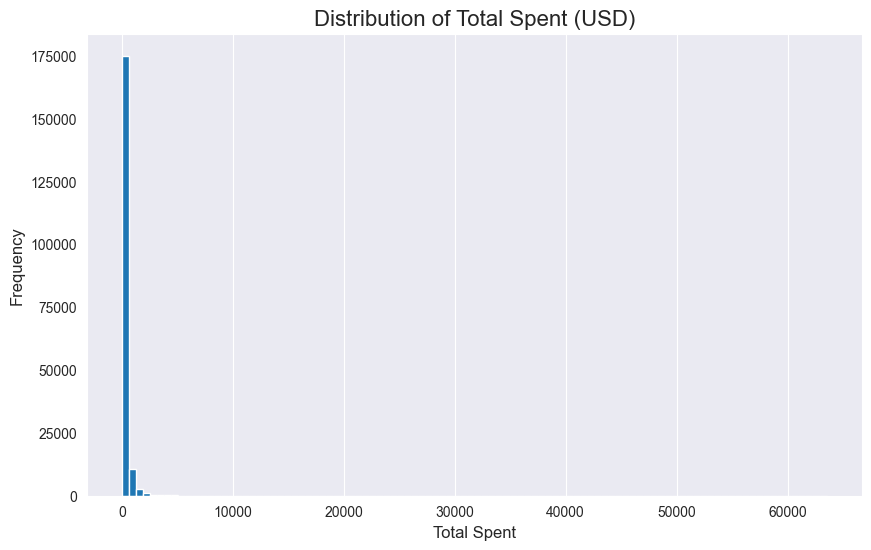

In [58]:
import matplotlib.pyplot as plt

# Plot the overall distribution of 'total_spent'
plt.figure(figsize=(10, 6))
plt.hist(df['total_spent_USD'], bins=100)
plt.title('Distribution of Total Spent (USD)', fontsize=16)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

the distribution of total spent is very skewed. if we take log(x+1) transformation - it becomes normal, which is easier to look at. We need to add 1 because we have a lot of zeros.

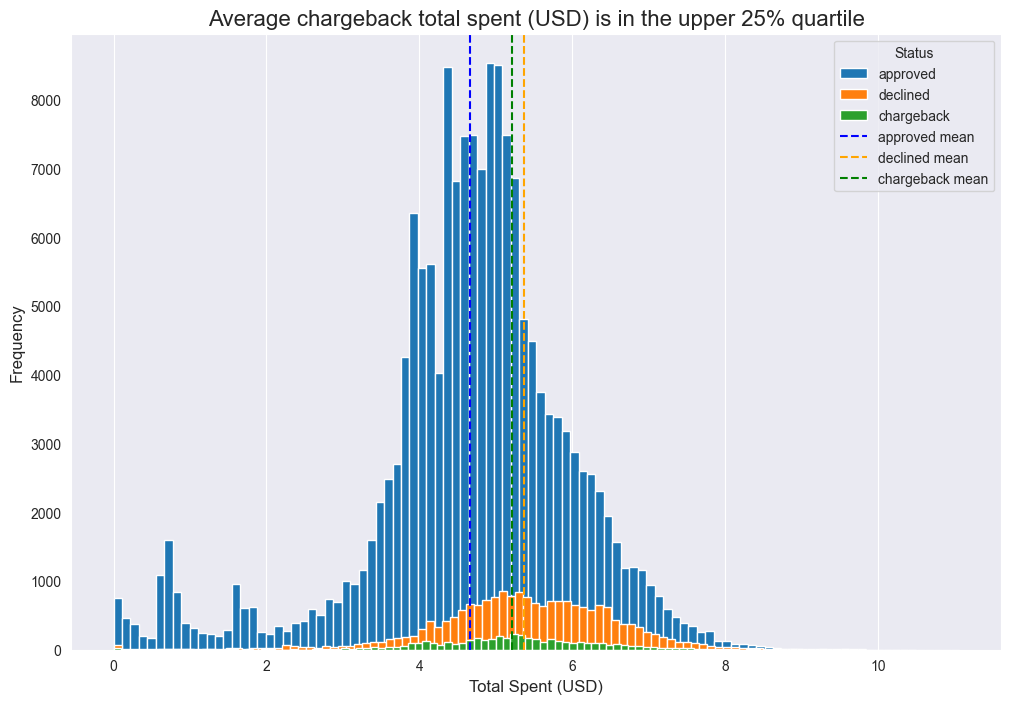

In [59]:
approved_mean = np.log(df[df.status == 'approved']['total_spent_USD'] + 1).mean()
declined_mean = np.log(df[df.status == 'declined']['total_spent_USD'] + 1).mean()
chargeback_mean = np.log(df[df.status == 'chargeback']['total_spent_USD'] + 1).mean()


# Plot the distribution of 'total_spent' by 'status'
plt.figure(figsize=(12, 8))
plt.hist(np.log(df[df.status == 'approved']['total_spent_USD']+1), bins=100, label='approved')
plt.hist(np.log(df[df.status == 'declined']['total_spent_USD']+1), bins=100, label='declined')
plt.hist(np.log(df[df.status == 'chargeback']['total_spent_USD']+1), bins=100, label='chargeback')
plt.axvline(approved_mean, color='blue', linestyle='dashed', linewidth=1.5, label='approved mean')
plt.axvline(declined_mean, color='orange', linestyle='dashed', linewidth=1.5, label='declined mean')
plt.axvline(chargeback_mean, color='green', linestyle='dashed', linewidth=1.5, label='chargeback mean')
plt.title('Average chargeback total spent (USD) is in the upper 25% quartile', fontsize=16)
plt.xlabel('Total Spent (USD)', fontsize=12) # here it's log(x+1) but for the sales report i will leave it like this for simplicity
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Status')
plt.grid(axis='y')
# Save the plot as an image with a white background
plt.savefig('log_total_spent_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

we can see that the average total spent for chargeback and declined is in the upper quartile of the spent distribution.

In [60]:
df['log(total_spent_USD+1)'] = np.log(df['total_spent_USD']+1)

there are 3 spikes on the left tail of the distribution. let's look at them.

In [61]:
# Define the threshold for the left tail
left_tail_threshold = 2

# Filter the data for approved status and log(total_spent_USD + 1) in the left tail
left_tail_approved = df[(df['status'] == 'approved') & (np.log(df['total_spent_USD'] + 1) < left_tail_threshold)]

# Define the bins used in the histogram
bins = np.linspace(0, left_tail_threshold, 100)

# Calculate log(total_spent_USD + 1) for left_tail_approved
log_total_spent = np.log(left_tail_approved['total_spent_USD'] + 1)

# Determine the bin each observation belongs to
bin_indices = np.digitize(log_total_spent, bins, right=True)

# Create a DataFrame for bin frequencies
bin_frequencies = (
    pd.DataFrame({'bin': bin_indices})
    .value_counts()
    .reset_index(name='frequency')
    .sort_values(by='frequency', ascending=False)
)

# Find the top 5 bins with the highest frequency
top_5_bins = bin_frequencies.head(5)

# Map bin indices back to bin ranges
bin_edges = pd.IntervalIndex.from_breaks(bins)
top_5_bins['bin_range'] = top_5_bins['bin'].map(lambda x: bin_edges[x - 1] if x <= len(bin_edges) else np.nan)
top_5_bins

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/1525175173.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_bins['bin_range'] = top_5_bins['bin'].map(lambda x: bin_edges[x - 1] if x <= len(bin_edges) else np.nan)


,bin,frequency,bin_range
0,35,510,"(0.686868686868687, 0.7070707070707072]"
1,33,395,"(0.6464646464646465, 0.6666666666666667]"
2,37,340,"(0.7272727272727273, 0.7474747474747475]"
3,1,335,"(0.0, 0.020202020202020204]"
4,31,300,"(0.6060606060606061, 0.6262626262626263]"


In [62]:
# Define the bins used in the histogram
bins = np.linspace(0, left_tail_threshold, 100)

# Calculate log(total_spent_USD + 1) for left_tail_approved
log_total_spent = np.log(left_tail_approved['total_spent_USD'] + 1)

# Map each observation to its respective bin
left_tail_approved['bin'] = np.digitize(log_total_spent, bins, right=True)

# Analyze data within each bin
# Example: Group by bin and analyze shipping and billing countries
bin_analysis = left_tail_approved.groupby('bin').agg({
    'total_spent_USD': [ 'min', 'mean', 'max', 'count'],
    'shipping_country_clean': lambda x: x.value_counts().head(3).to_dict(),
    'billing_country_clean': lambda x: x.value_counts().head(3).to_dict(),
    'email_domain': lambda x: x.value_counts().head(3).to_dict()
}).reset_index()

# Map bin indices back to bin ranges
bin_edges = pd.IntervalIndex.from_breaks(bins)
bin_analysis['bin_range'] = bin_analysis['bin'].map(lambda x: bin_edges[x - 1] if x <= len(bin_edges) else np.nan)

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/425213980.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_tail_approved['bin'] = np.digitize(log_total_spent, bins, right=True)


In [63]:
# Flatten the MultiIndex columns in bin_analysis
bin_analysis.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in bin_analysis.columns]

# Filter for specific bins and merge with top_4_bins on 'bin'
filtered_bin_analysis = bin_analysis[bin_analysis['bin'].isin(list(top_5_bins.bin))].reset_index(drop=True)
result = filtered_bin_analysis.merge(
    top_5_bins[['bin', 'frequency']],
    on='bin',
    how='left'
)

result.sort_values(by=['frequency'], ascending=[False], inplace=True)
result

,bin,total_spent_USD_min,total_spent_USD_mean,total_spent_USD_max,total_spent_USD_count,shipping_country_clean_<lambda>,billing_country_clean_<lambda>,email_domain_<lambda>,bin_range,frequency
3,35,0.987535,1.010235,1.028001,510,"{'JP': 488, 'HK': 6, 'US': 3}","{'JP': 486, 'HK': 6, 'US': 3}","{'gmail': 126, 'ezweb': 90, 'docomo': 77}","(0.686868686868687, 0.7070707070707072]",510
2,33,0.908800,0.926082,0.947533,395,"{'JP': 376, 'TW': 13, 'KR': 2}","{'JP': 376, 'TW': 13, 'KR': 2}","{'gmail': 113, 'docomo': 61, 'ezweb': 51}","(0.6464646464646465, 0.6666666666666667]",395
4,37,1.069605,1.092238,1.111640,340,"{'JP': 325, 'TH': 7, 'TW': 3}","{'JP': 325, 'TH': 7, 'TW': 3}","{'gmail': 88, 'docomo': 52, 'ezweb': 52}","(0.7272727272727273, 0.7474747474747475]",340
0,1,0.000884,0.008738,0.020000,335,"{'ID': 197, 'VN': 100, 'KR': 26}","{'ID': 197, 'VN': 101, 'KR': 26}","{'gmail': 185, 'yahoo': 80, 'personal_domain':...","(0.0, 0.020202020202020204]",335
1,31,0.833309,0.847104,0.869739,300,"{'JP': 290, 'TW': 2, 'TH': 1}","{'JP': 289, 'TW': 2, 'TH': 1}","{'gmail': 84, 'yahoo': 44, 'ezweb': 34}","(0.6060606060606061, 0.6262626262626263]",300


The spikes in the left tail are given by approved legitimate transactions in Asian countries like Japan (JP), Taiwan (TW), Thailand (TH), South Korea (KR), Hong Kong (HK), Indonesia (ID).

In [64]:
# Find the unique elements in 'billing_country_clean' and 'shipping_country_clean'

# Replace full names with ISO codes
df['billing_country_clean'] = df['billing_country_clean'].replace({
    'Aaland Islands': 'ALA',  # Aaland Islands to ALA (ISO code)
    'Croatia (Local Name: Hrvatska)': 'HR'  # Croatia (Hrvatska) to HR (ISO code)
})

df['shipping_country_clean'] = df['shipping_country_clean'].replace({
    'Aaland Islands': 'ALA',  # Aaland Islands to ALA (ISO code)
    'Croatia (Local Name: Hrvatska)': 'HR'  # Croatia (Hrvatska) to HR (ISO code)
})

# Define the mapping of countries to regions
country_to_region = {
    # North America
    'US': 'North America', 'CA': 'North America', 'MX': 'North America', 'GU': 'North America', 'PR': 'North America',

    # South America
    'AR': 'South America', 'BR': 'South America', 'CL': 'South America', 'CO': 'South America', 'EC': 'South America',
    'GY': 'South America', 'PE': 'South America', 'PY': 'South America', 'SR': 'South America', 'UY': 'South America',
    'VE': 'South America',

    # Europe
    'AD': 'Europe', 'AL': 'Europe', 'AM': 'Europe', 'AT': 'Europe', 'AX': 'Europe', 'BA': 'Europe', 'BE': 'Europe',
    'BG': 'Europe', 'BY': 'Europe', 'CH': 'Europe', 'CY': 'Europe', 'CZ': 'Europe', 'DE': 'Europe', 'DK': 'Europe',
    'EE': 'Europe', 'ES': 'Europe', 'FI': 'Europe', 'FR': 'Europe', 'FX': 'Europe', 'GB': 'Europe', 'GG': 'Europe',
    'GI': 'Europe', 'GR': 'Europe', 'HR': 'Europe', 'HU': 'Europe', 'IE': 'Europe', 'IM': 'Europe', 'IS': 'Europe',
    'IT': 'Europe', 'JE': 'Europe', 'LI': 'Europe', 'LT': 'Europe', 'LU': 'Europe', 'LV': 'Europe', 'MC': 'Europe',
    'MD': 'Europe', 'ME': 'Europe', 'MK': 'Europe', 'MT': 'Europe', 'NL': 'Europe', 'NO': 'Europe', 'PL': 'Europe',
    'PT': 'Europe', 'RO': 'Europe', 'RS': 'Europe', 'RU': 'Europe', 'SE': 'Europe', 'SI': 'Europe', 'SK': 'Europe',
    'SM': 'Europe', 'UA': 'Europe', 'VA': 'Europe',

    # Africa
    'AO': 'Africa', 'BF': 'Africa', 'BI': 'Africa', 'BJ': 'Africa', 'BW': 'Africa', 'CD': 'Africa', 'CF': 'Africa',
    'CG': 'Africa', 'CI': 'Africa', 'CM': 'Africa', 'CV': 'Africa', 'DJ': 'Africa', 'DZ': 'Africa', 'EG': 'Africa',
    'EH': 'Africa', 'ER': 'Africa', 'ET': 'Africa', 'GA': 'Africa', 'GH': 'Africa', 'GM': 'Africa', 'GN': 'Africa',
    'GQ': 'Africa', 'GW': 'Africa', 'KE': 'Africa', 'KM': 'Africa', 'LS': 'Africa', 'LR': 'Africa', 'LY': 'Africa',
    'MA': 'Africa', 'MG': 'Africa', 'ML': 'Africa', 'MR': 'Africa', 'MU': 'Africa', 'MW': 'Africa', 'MZ': 'Africa',
    'NA': 'Africa', 'NE': 'Africa', 'NG': 'Africa', 'RW': 'Africa', 'SC': 'Africa', 'SD': 'Africa', 'SH': 'Africa',
    'SL': 'Africa', 'SN': 'Africa', 'SO': 'Africa', 'ST': 'Africa', 'SZ': 'Africa', 'TD': 'Africa', 'TG': 'Africa',
    'TN': 'Africa', 'TZ': 'Africa', 'UG': 'Africa', 'YT': 'Africa', 'ZA': 'Africa', 'ZM': 'Africa', 'ZW': 'Africa',

    # Middle East
    'AE': 'Middle East', 'BH': 'Middle East', 'IL': 'Middle East', 'IQ': 'Middle East', 'IR': 'Middle East',
    'JO': 'Middle East', 'KW': 'Middle East', 'LB': 'Middle East', 'OM': 'Middle East', 'PS': 'Middle East',
    'QA': 'Middle East', 'SA': 'Middle East', 'SY': 'Middle East', 'YE': 'Middle East',

    # Asia
    'CN': 'Asia', 'HK': 'Asia', 'JP': 'Asia', 'KR': 'Asia', 'MO': 'Asia', 'TW': 'Asia',
    'BN': 'Asia', 'KH': 'Asia', 'ID': 'Asia', 'LA': 'Asia', 'MY': 'Asia',
    'MM': 'Asia', 'PH': 'Asia', 'SG': 'Asia', 'TH': 'Asia', 'VN': 'Asia',
    'AF': 'Asia', 'BD': 'Asia', 'BT': 'Asia', 'IN': 'Asia', 'LK': 'Asia', 'MV': 'Asia',
    'NP': 'Asia', 'PK': 'Asia',

    # Oceania
    'AU': 'Oceania', 'FJ': 'Oceania', 'NC': 'Oceania', 'NZ': 'Oceania', 'PG': 'Oceania', 'VU': 'Oceania',

    # Uncategorized / Default
    'nan': 'Uncategorized', 'XXX': 'Uncategorized', 'UN': 'Uncategorized'
}

# Map the regions
df['billing_region'] = df['billing_country_clean'].map(country_to_region)
df['shipping_region'] = df['shipping_country_clean'].map(country_to_region)


In [65]:
# check shipping methods per shipping continent

df.groupby(['shipping_region', 'shipping_method'], as_index=False)['order_id'].nunique().sort_values(by=['shipping_region','order_id'],ascending=[True, False]).groupby(['shipping_region']).head(1)

,shipping_region,shipping_method,order_id
48,Africa,value_1938,54
273,Asia,value_1938,9073
822,Europe,value_1609,5745
1492,Middle East,value_1938,276
1993,North America,value_1645,18222
3289,Oceania,value_291,2033
3419,South America,value_1301,1239


it's interesting to see that for africa, asia and middle east shipping method 1938 is the most common.

In [66]:
# for each status, what's the domain with highest avg total_spent?
avg_total_spent_per_domain = (
    df.groupby(['status', 'email_domain'], as_index=False)['total_spent_USD']
    .mean()
)

# Filter for 'chargeback' status and sort by average 'total_spent' in descending order
chargeback_top_domain = (
    avg_total_spent_per_domain[avg_total_spent_per_domain['status'] == 'chargeback']
    .sort_values(by='total_spent_USD', ascending=False)
    .head(3)  # Get the domain with the highest avg total_spent for chargeback
)

# Optional: Do the same for all statuses
top_domains_by_status = (
    avg_total_spent_per_domain
    .sort_values(by=['status', 'total_spent_USD'], ascending=[True, False])
    .groupby('status')
    .head(1)  # Get the domain with the highest avg total_spent for each status
    .reset_index(drop=True)
)

# Print the result for chargeback
print("Top email domain for chargeback by highest avg total_spent:")
print(chargeback_top_domain)

# Print the result for all statuses
print("\nTop email domains for all statuses by highest avg total_spent:")
print(top_domains_by_status)


Top email domain for chargeback by highest avg total_spent:
        status email_domain  total_spent_USD
58  chargeback      hanmail      1333.710000
50  chargeback          aol       878.956306
76  chargeback         sina       830.142004

Top email domains for all statuses by highest avg total_spent:
       status email_domain  total_spent_USD
0    approved           qq       504.781450
1  chargeback      hanmail      1333.710000
2    declined   googlemail      1035.897592


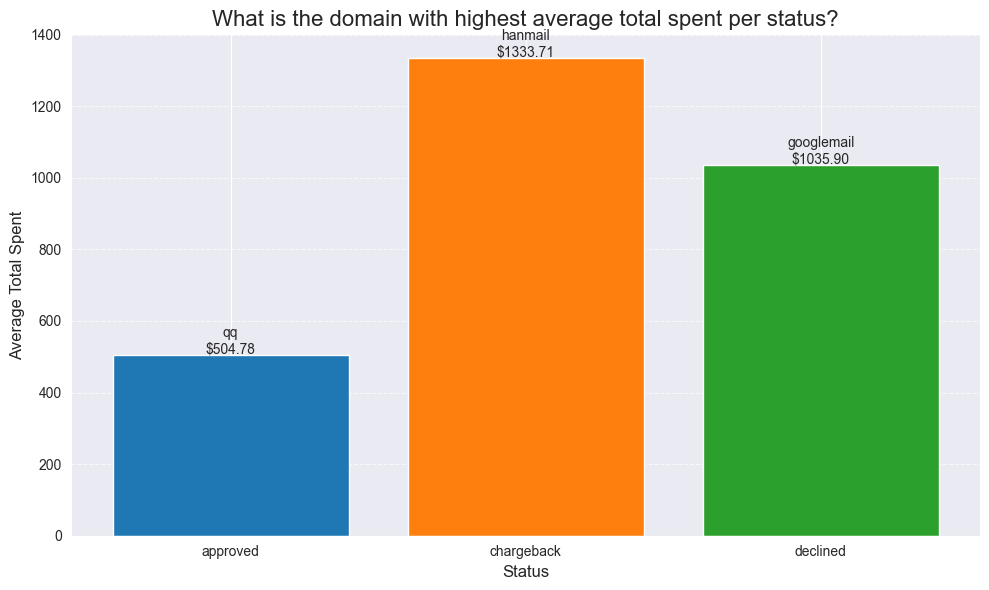

In [67]:
statuses = top_domains_by_status['status']
email_domains = top_domains_by_status['email_domain']
avg_total_spent = top_domains_by_status['total_spent_USD']

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(statuses, avg_total_spent, color=plt.cm.tab10(range(len(statuses))))

# Add title and labels
plt.title('What is the domain with highest average total spent per status?', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Average Total Spent', fontsize=12)

# Annotate each bar with the corresponding email domain and avg total spent
for bar, domain, value in zip(bars, email_domains, avg_total_spent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f"{domain}\n${value:.2f}", ha='center', fontsize=10)

# Show grid and the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [68]:
# Filter for 'chargeback' status and sort by average 'total_spent' in descending order
chargeback_top_domain = (
    avg_total_spent_per_domain[avg_total_spent_per_domain['status'] == 'chargeback']
    .sort_values(by='total_spent_USD', ascending=False)
    .head(5)  # Get the domain with the highest avg total_spent for chargeback
)

In [69]:
chargeback_spent_domains = avg_total_spent_per_domain[avg_total_spent_per_domain['status'] == 'chargeback'].sort_values(by='total_spent_USD', ascending=False)
chargeback_spent_domains['percentage'] = (chargeback_spent_domains['total_spent_USD'] / chargeback_spent_domains['total_spent_USD'].sum())*100

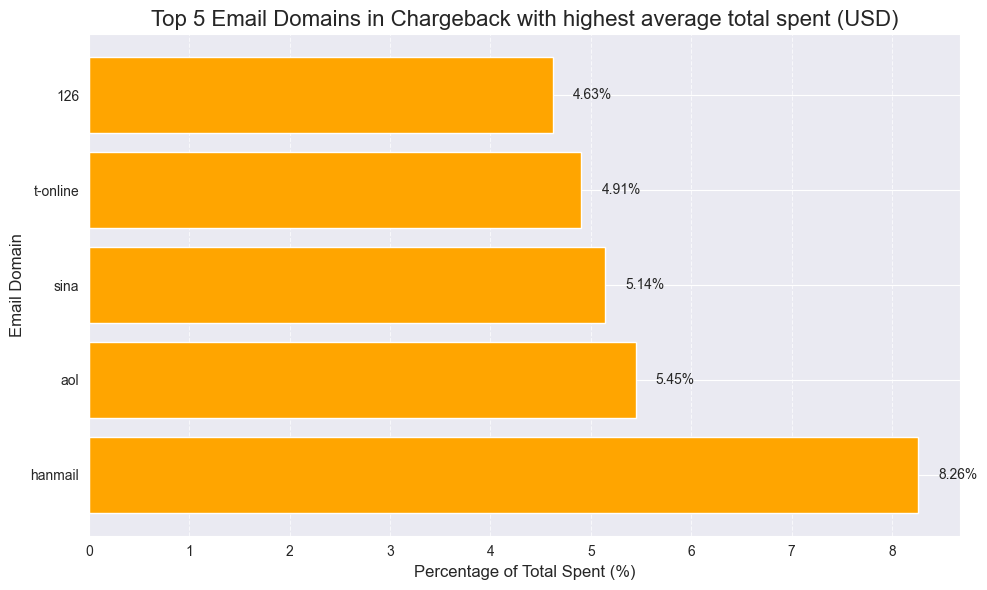

In [71]:
# Extract the top 5 email domains for chargeback based on percentage
top5_chargeback_domains = chargeback_spent_domains.head(5)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top5_chargeback_domains['email_domain'], top5_chargeback_domains['percentage'], color='orange')

# Add labels and title
plt.title('Top 5 Email Domains in Chargeback with highest average total spent (USD)', fontsize=16)
plt.xlabel('Percentage of Total Spent (%)', fontsize=12)
plt.ylabel('Email Domain', fontsize=12)

# Annotate the bars with percentage values
for i, (percentage, domain) in enumerate(zip(top5_chargeback_domains['percentage'], top5_chargeback_domains['email_domain'])):
    plt.text(percentage + 0.2, i, f"{percentage:.2f}%", va='center', fontsize=10)

# Adjust the layout and show the plot
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('email_domain_chargeback_spent.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


In [72]:
df[df.status=='chargeback'].groupby(['email_domain'])['order_id'].nunique()

email_domain
126                  10
163                  27
AOL                  10
GMAIL                44
HOTMAIL              30
YAHOO                18
aol                  40
bigpond               1
btinternet            2
comcast               1
free                  1
gmail              1395
gmx                  43
googlemail            9
hanmail               1
hotmail             688
i                     1
icloud               48
laposte              16
libero               12
live                 38
mac                   4
mail                  6
me                   10
msn                  11
naver                 7
orange               14
outlook              75
personal_domain     438
qq                   58
rogers                3
shaw                  1
sina                  8
t-online             10
wanadoo              10
web                  46
yahoo               514
ymail                 7
Name: order_id, dtype: int64

For chargeback transactions, the domains with highest average total spent are hanmail and aol. So Riskified as a company should be careful with these domains as they might be the most expensive for the company even if they are not the most frequent.

In [73]:
df['currency_code'].value_counts(dropna=False)
# we have 35 different currencies

currency_code
USD    124681
EUR     27356
GBP     11874
CAD      6493
JPY      5633
BRL      3393
TWD      2481
AUD      1343
DKK       932
HKD       759
KRW       687
NOK       566
SEK       548
CHF       535
SGD       509
MYR       447
THB       313
PLN       249
IDR       241
MXN       174
RUB       125
NZD       123
VND       110
AED       101
ARS        86
CNY        85
SAR        80
ILS        21
CZK        18
PHP        15
INR         8
TRY         6
ZAR         5
HRK         2
KES         1
Name: count, dtype: int64

In [74]:
# what's the most common currency per status?

currency_per_status = (
    df.groupby(['status', 'currency_code'], as_index=False,  dropna=False)['order_id']
    .nunique()
    .sort_values(by=['status', 'order_id'], ascending=[True, False])
)

# Get the top 3 shipping methods for each status
top_currencies = (
    currency_per_status
    .groupby('status')
    .head(3)
    .reset_index(drop=True)
)

print(top_currencies)

       status currency_code  order_id
0    approved           USD    106930
1    approved           EUR     24942
2    approved           GBP     10322
3  chargeback           USD      1860
4  chargeback           BRL       674
5  chargeback           EUR       627
6    declined           USD     15478
7    declined           EUR      1642
8    declined           GBP      1284


the second most common currency for chargeback transactions is BRL (Brazilian Real)

In [75]:
df[(df.currency_code == 'BRL') & (df.billing_country_code != df.shipping_country_code)]

,order_id,status,email_anoni,billing_country_code,shipping_country_code,shipping_method,created_at,total_spent,currency_code,gateway,...,month,season,day_of_week,is_weekend,billing_country_clean,shipping_country_clean,total_spent_USD,log(total_spent_USD+1),billing_region,shipping_region
62999,184583137,approved,MmWsu3S@aol.com,US,BR,NaN,2017-04-29,194.650588,BRL,value_4,...,4,Spring,Saturday,True,US,BR,38.930118,3.687131,North America,South America
63326,103726481,approved,CdMaDULF@gmail.com,BR,NaN,value_421,2016-09-13,61.804843,BRL,value_4,...,9,Fall,Tuesday,False,BR,NaN,12.360969,2.592338,South America,NaN
95544,213468639,approved,KcJQWvjY4O6l27t@gmail.com,BR,NaN,NaN,2017-07-11,71.626649,BRL,value_4,...,7,Summer,Tuesday,False,BR,NaN,14.325330,2.729507,South America,NaN
102773,187104740,approved,CTdEnY0TYKOY@gmail.com,VE,BR,NaN,2017-05-06,341.809545,BRL,value_4,...,5,Spring,Saturday,True,VE,BR,68.361909,4.239338,South America,South America
147368,199927845,approved,3S7NV8d@yahoo.com.br,FR,BR,NaN,2017-06-12,833.155565,BRL,value_4,...,6,Summer,Monday,False,FR,BR,166.631113,5.121766,Europe,South America
179886,183963328,chargeback,vBhjbU1g@yahoo.com.br,BR,BN,NaN,2017-04-27,493.642002,BRL,value_4,...,4,Spring,Thursday,False,BR,BN,98.728400,4.602450,South America,Asia
180399,183963328,chargeback,nthBjh0L@yahoo.com.br,BR,BN,NaN,2017-04-27,493.642002,BRL,value_4,...,4,Spring,Thursday,False,BR,BN,98.728400,4.602450,South America,Asia


if we look at transactions done in BRL - we have 7 order_id's where the billing and shipping code differ. among these orders, there is one that comes from 2 different email addresses.

In [76]:
# what's the currency with the highest avg total_spent(USD) per status

df.groupby(['status','currency_code'], as_index=False)['total_spent_USD'].mean().sort_values(by=['status','total_spent_USD'], ascending=[True, False]).groupby(['status']).head(3)

,status,currency_code,total_spent_USD
10,approved,GBP,409.771392
12,approved,HRK,338.545092
5,approved,CHF,317.199789
43,chargeback,GBP,804.828404
42,chargeback,EUR,534.958300
38,chargeback,CAD,439.068024
71,declined,GBP,742.544790
66,declined,CHF,721.997524
70,declined,EUR,667.454989


although the brazilian real is the second most common currency for chargeback transactions (the first being USD), the currency with the highest average total spent in USD (so that we can compare the amounts) for chargebacks is the british pound, and after it the euro.

In [77]:
# count number of billing-shipping mismatch per status (mismatch is not a factor in chargeback)
df['billing_shipping_mismatch'] = np.where(df['billing_country_clean']!=df['shipping_country_clean'], 1, 0)
df.groupby(['status'])['billing_shipping_mismatch'].sum()/df.groupby(['status'])['billing_shipping_mismatch'].sum().sum()

status
approved      0.838468
chargeback    0.017830
declined      0.143702
Name: billing_shipping_mismatch, dtype: float64

In [78]:
# gateway: Service provider used to authorize credit card payments
df.groupby(['status','gateway'], as_index=False)['order_id'].nunique().sort_values(by=['status','order_id'], ascending=[True, False]).groupby('status').head(3)

,status,gateway,order_id
200,approved,value_65,27387
112,approved,value_21,22981
69,approved,value_169,22386
298,chargeback,value_4,865
309,chargeback,value_65,312
276,chargeback,value_196,255
426,declined,value_245,5476
354,declined,value_136,1737
416,declined,value_21,1334


the most frequent service provider for CC payment authorizations in chargeback transaction is 4. let's get a more in-detail picture of this:

In [79]:
# compare risky profile within chargeback
group_by_status = df.groupby(['status','gateway','currency_code','billing_region','shipping_method','V6_avs_result','V7_bill_ship_name_match'], as_index=False)['order_id'].nunique().sort_values(by=['status','order_id'], ascending=[True, False]).groupby('status').head(20)
group_by_status[group_by_status.status == 'chargeback']

,status,gateway,currency_code,billing_region,shipping_method,V6_avs_result,V7_bill_ship_name_match,order_id
11923,chargeback,value_4,BRL,South America,value_1301,Unsupported,FL,198
11881,chargeback,value_245,USD,North America,value_1059,Unsupported,FL,165
11913,chargeback,value_29,EUR,Europe,value_2132,Missing,FL,123
11369,chargeback,value_148,EUR,Europe,value_291,Unsupported,FL,67
11912,chargeback,value_29,EUR,Europe,value_1938,Missing,FL,56
12100,chargeback,value_65,USD,North America,value_1794,Unsupported,FL,46
11281,chargeback,value_11,EUR,Europe,value_1273,Unsupported,FL,40
12088,chargeback,value_65,USD,North America,value_1645,Full Match,FL,35
11351,chargeback,value_136,USD,North America,value_1059,Full Match,NO_MATCH,33
11386,chargeback,value_148,USD,Oceania,value_291,Unsupported,FL,33


Frequency wise - transactions done in Brazilian Real through gateway 4 and shipping method 1301, where the billing region is South America are the most common type of profile within chargebacks. For this segment, we can see as well that the billing address match between the transaction and the credit card file is unsupported, even if both name and surname match.

In [80]:
# most common status per profile
grouped_data = (
    df.groupby(['gateway', 'currency_code', 'billing_country_code', 'shipping_method',
                'V6_avs_result', 'V7_bill_ship_name_match', 'status'], as_index=False)
      .agg(distinct_orders=('order_id', 'nunique'))  # Count distinct order IDs
)

sorted_data = grouped_data.sort_values(by=['distinct_orders'], ascending=False)

most_common_status = (
    sorted_data.loc[sorted_data.groupby(
        ['gateway', 'currency_code', 'billing_country_code', 'shipping_method',
         'V6_avs_result', 'V7_bill_ship_name_match'])['distinct_orders'].idxmax()]
)

most_common_status = most_common_status.sort_values(by='distinct_orders', ascending=False)

most_common_status[most_common_status.status == 'chargeback']


,gateway,currency_code,billing_country_code,shipping_method,V6_avs_result,V7_bill_ship_name_match,status,distinct_orders
18056,value_29,EUR,DE,value_2132,Missing,FL,chargeback,123
18052,value_29,EUR,DE,value_1938,Missing,FL,chargeback,56
16845,value_242,USD,MX,value_1878,Unsupported,FL,chargeback,21
11867,value_196,USD,MX,value_74,Missing,FL,chargeback,13
16485,value_22,EUR,DE,value_515,Unsupported,FL,chargeback,11
...,...,...,...,...,...,...,...,...
10608,value_196,USD,CR,value_1834,Missing,NO_MATCH,chargeback,1
10628,value_196,USD,CZ,value_2114,Missing,F,chargeback,1
10319,value_196,USD,CA,value_550,No Match,FL,chargeback,1
10352,value_196,USD,CA,value_680,Full Match,NO_MATCH,chargeback,1


this aggregation focuses on risky combinations where the likelihood of chargebacks is the highest. The top 5:
- value_29, EUR, DE, value_2132, Missing, FL
- value_29, EUR, DE, value_1938, Missing, FL
- value_242, USD, MX, value_1878, Unsupported, FL
- value_196, USD, MX, value_74, Missing, FL
- value_22, EUR, DE, value_515, Unsupported, FL

In these profiles, we have transaction where the billing country is Mexico or Germany, where gateway 29 is the most common. The transactions are in EUR/USD, and the level of matching between billing address in transaction and CC is either missing or unsupported, even if both name and surname match.


/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/60346575.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


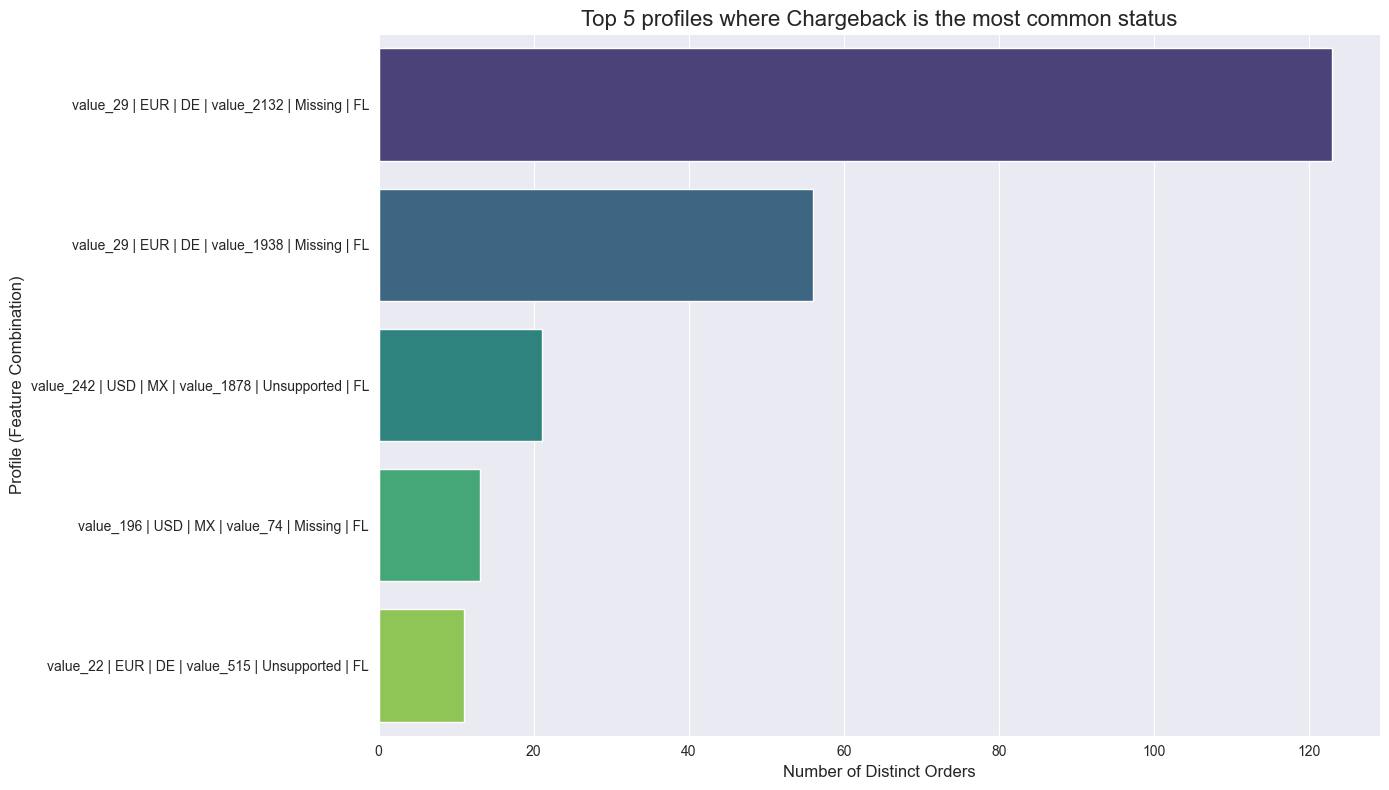

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'most_common_status' is the DataFrame with the chargeback profiles
chargeback_profiles = most_common_status[most_common_status['status'] == 'chargeback'].head(5)

# Create a new column to represent the profile as a single label
chargeback_profiles['profile'] = (
    chargeback_profiles['gateway'] + " | " +
    chargeback_profiles['currency_code'] + " | " +
    chargeback_profiles['billing_country_code'] + " | " +
    chargeback_profiles['shipping_method'] + " | " +
    chargeback_profiles['V6_avs_result'] + " | " +
    chargeback_profiles['V7_bill_ship_name_match']
)

# Sort profiles by distinct_orders
chargeback_profiles = chargeback_profiles.sort_values(by='distinct_orders', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    data=chargeback_profiles,
    x='distinct_orders',
    y='profile',  # Use the concatenated profile label
    palette='viridis'
)

# Add labels and title
plt.title('Top 5 profiles where Chargeback is the most common status', fontsize=16)
plt.xlabel('Number of Distinct Orders', fontsize=12)
plt.ylabel('Profile (Feature Combination)', fontsize=12)
plt.tight_layout()

plt.savefig('top5_profiles_chargeback_common.png', dpi=300, bbox_inches='tight', facecolor='white')
# Show the plot
plt.show()


In [82]:
# for each profile, identify the highest spending status.
grouped_data = (
    df.groupby(['gateway', 'currency_code', 'billing_country_code', 'shipping_method',
                'V6_avs_result', 'V7_bill_ship_name_match', 'status'], as_index=False)
      .agg(mean_total_spent=('total_spent_USD', 'mean'))  # Calculate mean total_spent_USD
)

# Sort by mean_total_spent in descending order
sorted_data = grouped_data.sort_values(by=['mean_total_spent'], ascending=False)

# Find the profile where the mean total_spent_USD is the highest for each combination of features
most_common_status_by_spend = (
    sorted_data.loc[sorted_data.groupby(
        ['gateway', 'currency_code', 'billing_country_code', 'shipping_method',
         'V6_avs_result', 'V7_bill_ship_name_match'])['mean_total_spent'].idxmax()]
)

# Sort the final result for readability
most_common_status_by_spend = most_common_status_by_spend.sort_values(by='mean_total_spent', ascending=False)

# Filter for chargeback profiles
chargeback_profiles_by_spend = most_common_status_by_spend[most_common_status_by_spend.status == 'chargeback']

# Display the result
chargeback_profiles_by_spend


,gateway,currency_code,billing_country_code,shipping_method,V6_avs_result,V7_bill_ship_name_match,status,mean_total_spent
19000,value_4,USD,AE,value_1301,Unsupported,FL,chargeback,11327.430000
18559,value_4,EUR,IL,value_1301,Unsupported,FL,chargeback,7504.714581
18267,value_4,EUR,AE,value_1301,Unsupported,FL,chargeback,7483.172708
21343,value_47,USD,CA,value_417,Full Match,FL,chargeback,6617.270000
18912,value_4,GBP,PT,value_1301,Unsupported,FL,chargeback,5878.048259
...,...,...,...,...,...,...,...,...
15503,value_21,JPY,JP,value_1938,Unsupported,FL,chargeback,1.231529
15534,value_21,KRW,KR,value_1938,Full Match,FL,chargeback,0.110329
15468,value_21,IDR,CA,value_1938,Full Match,NO_MATCH,chargeback,0.011892
15472,value_21,IDR,ID,value_1938,Unsupported,FL,chargeback,0.010588


/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/109734640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_spending_profiles['profile'] = (
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/109734640.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


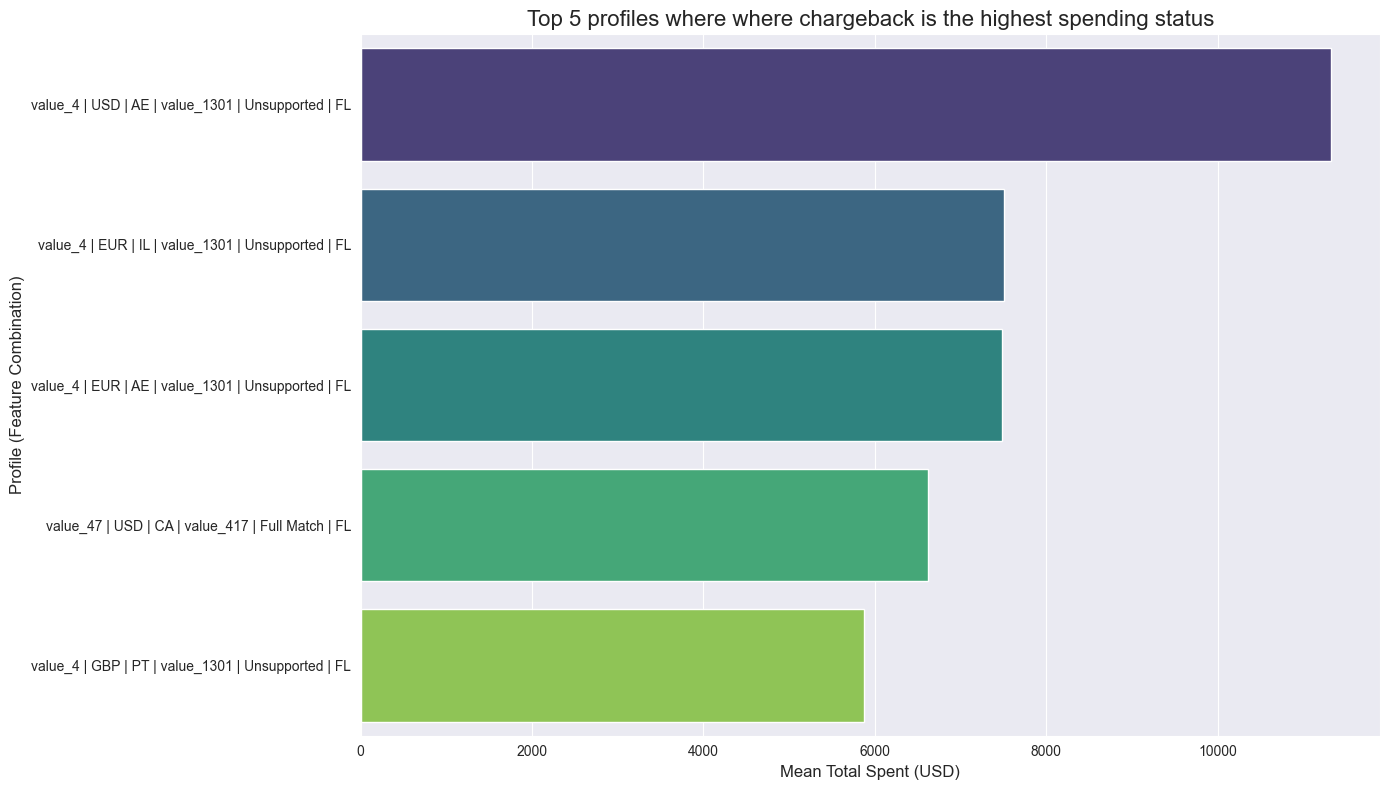

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 spending profiles
top_5_spending_profiles = chargeback_profiles_by_spend.head(5)

# Create a new column to represent the profile as a single label
top_5_spending_profiles['profile'] = (
    top_5_spending_profiles['gateway'] + " | " +
    top_5_spending_profiles['currency_code'] + " | " +
    top_5_spending_profiles['billing_country_code'] + " | " +
    top_5_spending_profiles['shipping_method'] + " | " +
    top_5_spending_profiles['V6_avs_result'] + " | " +
    top_5_spending_profiles['V7_bill_ship_name_match']
)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_5_spending_profiles,
    x='mean_total_spent',
    y='profile',
    palette='viridis'
)

# Add labels and title
plt.title('Top 5 profiles where where chargeback is the highest spending status', fontsize=16)
plt.xlabel('Mean Total Spent (USD)', fontsize=12)
plt.ylabel('Profile (Feature Combination)', fontsize=12)
plt.tight_layout()
plt.savefig('top5_profiles_chargeback_spent.png', dpi=300, bbox_inches='tight', facecolor='white')
# Show the plot
plt.show()


Cost wise - Transactions done in USD or EUR through gateway 4 and shipping method 1301 where the billing country is either Israel or the Emirates, are the most expensive chargeback transactions. For these transactions as well the billing address match between transaction and credit card file is unsupported. Even if both name and surname match.

In [84]:
# the distribution of V1 between the 3 status categories is quite similar. i don't expect this feature to be discriminative in the classification problem.
df.groupby(['status','V1_link'])['order_id'].nunique()/df.groupby(['status'])['order_id'].nunique()

status      V1_link
approved    False      0.997116
            True       0.002866
chargeback  False      0.993164
            True       0.006563
declined    False      0.968081
            True       0.031769
Name: order_id, dtype: float64

In [85]:
# v2 and v3 vs status
df[['V2_distance','V3_distance']].corr()

,V2_distance,V3_distance
V2_distance,1.000000,0.836016
V3_distance,0.836016,1.000000


these two datapoints seem to be highly correlated. in what are they different then?

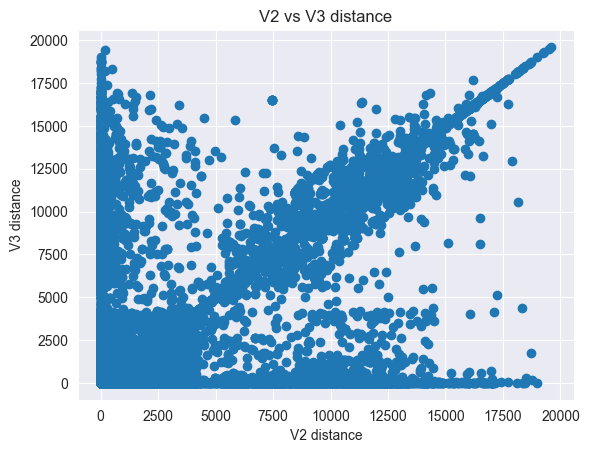

In [86]:
plt.scatter(df.V2_distance, df.V3_distance)
plt.xlabel('V2 distance')
plt.ylabel('V3 distance')
plt.title('V2 vs V3 distance')
plt.show()

it seems like the correlation is not perfect because of the datapoints that lay above and below the main diagonal x=y.

In [87]:
df[['V2_distance', 'V3_distance']].describe()

,V2_distance,V3_distance
count,157964.000000,158957.000000
mean,1176.859443,1262.328208
std,3088.102927,3206.620899
min,0.000000,0.000000
25%,4.000000,4.000000
50%,13.000000,13.000000
75%,174.000000,198.000000
max,19610.000000,19610.000000


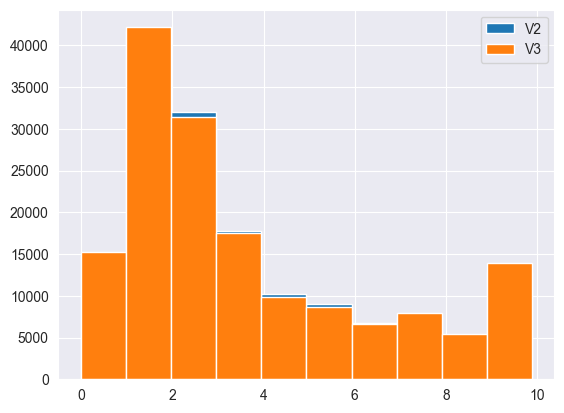

In [88]:
plt.hist(np.log(df.V2_distance + 1), label='V2')
plt.hist(np.log(df.V3_distance + 1), label='V3')
plt.legend()
plt.show()

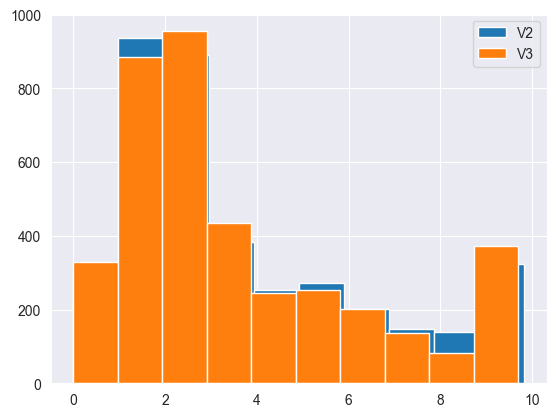

In [89]:
plt.hist(np.log(df[df.status=='chargeback'].V2_distance + 1), label='V2')
plt.hist(np.log(df[df.status=='chargeback'].V3_distance + 1), label='V3')
plt.legend()
plt.show()

In [90]:
df.isna().sum()/df.shape[0]

order_id                     0.000000
status                       0.000000
email_anoni                  0.000000
billing_country_code         0.004089
shipping_country_code        0.001468
shipping_method              0.023889
created_at                   0.000000
total_spent                  0.000000
currency_code                0.000000
gateway                      0.000726
V1_link                      0.000037
V2_distance                  0.168611
V3_distance                  0.163384
V4_our_age                   0.000037
V5_merchant_age              0.000037
V6_avs_result                0.000037
V7_bill_ship_name_match      0.000037
V8_ip                        0.025621
V9_cookie                    0.000968
V10_cookie                   0.009747
V11_cookie                   0.414237
email_domain                 0.000000
email_address_count          0.000000
year                         0.000000
month                        0.000000
season                       0.000000
day_of_week 

these 2 features have around 16-17% of missing values each, but their distribution is almost identical.

In [91]:
df[df.V2_distance > df.V3_distance].groupby(['status'])['order_id'].nunique()

status
approved      9886
chargeback     273
declined      2268
Name: order_id, dtype: int64

In [92]:
df[df.V2_distance < df.V3_distance].groupby(['status'])['order_id'].nunique()

status
approved      10248
chargeback      178
declined       1731
Name: order_id, dtype: int64

we have 53% more chargebacks when V2_distance > V3_distance compared to V2_distance < V3_distance. I will add this as feature:

In [93]:
df['V2_distance>V3_distance'] = np.where(df['V2_distance']>df['V3_distance'],1,0)

In [94]:
# since these features are highly correlated with each other, I will engineer 2 different features
df['V2_V3_avg_distance'] = (df['V2_distance'] + df['V3_distance'])/2 # average because the distribution is quite similar
df['V2_V3_interaction'] = (df['V2_distance'] * df['V3_distance']) #interaction, if v2 depends on v3 or vicevers

let's see if v2 and v3 are correlated to other numerical features:

In [95]:
df[['total_spent_USD','V2_distance', 'V3_distance','V4_our_age','V5_merchant_age', 'V8_ip', 'V9_cookie', 'V10_cookie', 'V11_cookie','email_address_count']].corr()

,total_spent_USD,V2_distance,V3_distance,V4_our_age,V5_merchant_age,V8_ip,V9_cookie,V10_cookie,V11_cookie,email_address_count
total_spent_USD,1.000000,0.049105,0.044297,0.061216,0.013702,0.045617,0.047896,0.179606,0.087058,0.027830
V2_distance,0.049105,1.000000,0.836016,0.049671,0.005155,0.118455,0.039970,0.044467,0.013824,-0.014016
V3_distance,0.044297,0.836016,1.000000,0.052180,0.002498,0.109975,0.044392,0.034327,0.023297,-0.015179
V4_our_age,0.061216,0.049671,0.052180,1.000000,0.007440,-0.009750,0.019174,0.053236,0.136960,0.008783
V5_merchant_age,0.013702,0.005155,0.002498,0.007440,1.000000,-0.002669,0.007346,0.022975,0.049137,-0.002073
V8_ip,0.045617,0.118455,0.109975,-0.009750,-0.002669,1.000000,0.102816,0.099466,-0.031715,-0.000995
V9_cookie,0.047896,0.039970,0.044392,0.019174,0.007346,0.102816,1.000000,-0.037776,0.255656,-0.009417
V10_cookie,0.179606,0.044467,0.034327,0.053236,0.022975,0.099466,-0.037776,1.000000,-0.124429,0.112696
V11_cookie,0.087058,0.013824,0.023297,0.136960,0.049137,-0.031715,0.255656,-0.124429,1.000000,-0.030637
email_address_count,0.027830,-0.014016,-0.015179,0.008783,-0.002073,-0.000995,-0.009417,0.112696,-0.030637,1.000000


all the other correlations seem quite low.

In [96]:
# V4 and V5
df[['V4_our_age','V5_merchant_age']].describe()

,V4_our_age,V5_merchant_age
count,189993.000000,189993.000000
mean,653.947451,216.220645
std,2046.051781,6976.480661
min,0.000000,-323.000000
25%,0.000000,0.000000
50%,51.000000,1.000000
75%,692.000000,82.000000
max,730603.000000,736666.000000


In [97]:
df[['V4_our_age','V5_merchant_age']].corr()

,V4_our_age,V5_merchant_age
V4_our_age,1.00000,0.00744
V5_merchant_age,0.00744,1.00000


In [98]:
df['V4_our_age'].value_counts()/df['V4_our_age'].value_counts().sum()

V4_our_age
0.0       0.424031
1.0       0.006516
2.0       0.003558
3.0       0.002821
6.0       0.002584
            ...   
5351.0    0.000005
5946.0    0.000005
6434.0    0.000005
3563.0    0.000005
4633.0    0.000005
Name: count, Length: 6324, dtype: float64

In [99]:
df['V5_merchant_age'].value_counts()/df['V5_merchant_age'].value_counts().sum()

V5_merchant_age
 0.0       0.334344
 1.0       0.257773
 2.0       0.011864
 3.0       0.008227
 4.0       0.006295
             ...   
 3576.0    0.000005
 2609.0    0.000005
 2701.0    0.000005
 2638.0    0.000005
-12.0      0.000005
Name: count, Length: 2920, dtype: float64

42% of the values of V4_our_age are zeros, 33% of the values of V5_merchant_age are zeros. both distributions are very skewed.

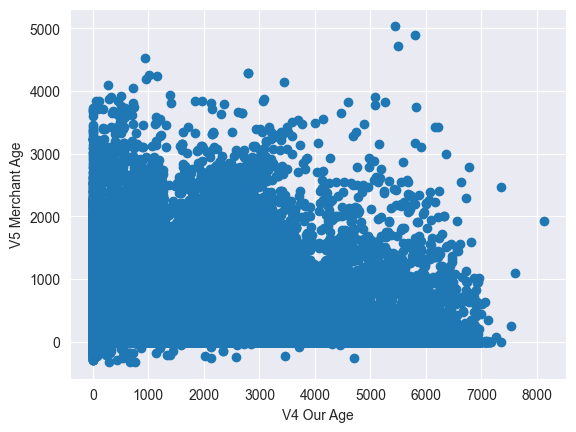

In [100]:
plt.scatter(df[(df['V4_our_age']<15000) & (df['V5_merchant_age']<15000)]['V4_our_age'], df[(df['V4_our_age']<15000) & (df['V5_merchant_age']<15000)]['V5_merchant_age'])
plt.xlabel('V4 Our Age')
plt.ylabel('V5 Merchant Age')
plt.show()

In [101]:
df[(df['V4_our_age']<15000) & (df['V5_merchant_age']<15000)][['V4_our_age','V5_merchant_age']].corr()

,V4_our_age,V5_merchant_age
V4_our_age,1.000000,0.195469
V5_merchant_age,0.195469,1.000000


when we drop some outliers based on the scatterplot, the correlation increases.

In [102]:
df[(df['V4_our_age']<15000) & (df['V5_merchant_age']<15000)].shape[0]/df.shape[0]

0.9998421052631579

removing these outliers would still allow us to keep 99% of the data.

In [103]:
df.groupby(['status'])['V4_our_age'].mean()

status
approved      653.083143
chargeback    801.660377
declined      627.429164
Name: V4_our_age, dtype: float64

In [104]:
df.groupby(['status'])['V5_merchant_age'].mean()

status
approved      243.197566
chargeback     59.256033
declined       28.814372
Name: V5_merchant_age, dtype: float64

dropping the outliers would not change drastically the average value of the feature per status, even if the increase in correlation after dropping the outliers is significant. i do see that chargeback transactions have a higher average value of V4_our_age, but lower values for V5_merchant_age.

In [105]:
df['V4_our_age>V5_merchant_age'] = np.where(df['V4_our_age']>df['V5_merchant_age'],1,0)

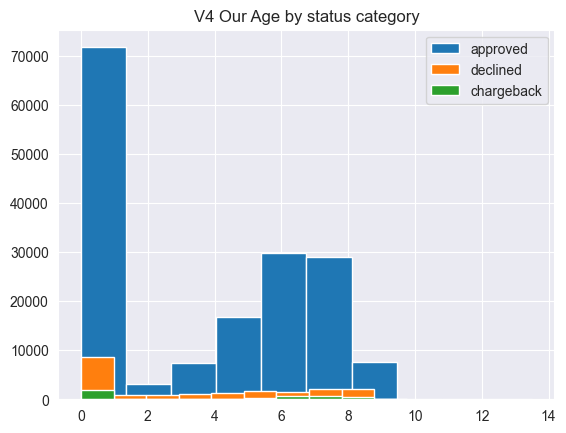

In [106]:
plt.hist(np.log(df[df.status=='approved']['V4_our_age'] + 1), bins=10, label='approved')
plt.hist(np.log(df[df.status=='declined']['V4_our_age'] + 1), bins=10, label='declined')
plt.hist(np.log(df[df.status=='chargeback']['V4_our_age'] + 1), bins=10, label='chargeback')
plt.legend()
plt.title('V4 Our Age by status category')
plt.show()

In [107]:
# since V5_merchant_age_log i will create a feature which shifts it to a positive scale because age it's not supposed to be negative. then i take log(x+1) because the variable is very skewed. i do the same for V4 but i take the log only since the variable does not have negative values.
min_value = df['V5_merchant_age'].min()
df['V5_merchant_age_log_shift'] = np.log(df['V5_merchant_age'] - min_value + 1)
df['V5_merchant_age_log'] = np.log(df['V5_merchant_age']+ 1)
df['V4_our_age_log'] = np.log(df['V4_our_age']+ 1)

/Users/michaelbenmergui/Documents/Gioia/PycharmProjects/data-wizard-gioia/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/michaelbenmergui/Documents/Gioia/PycharmProjects/data-wizard-gioia/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [108]:
# for each matching level, what's the most common status?
df.groupby(['V6_avs_result','status'])['order_id'].nunique()/df.groupby(['V6_avs_result'])['order_id'].nunique()

V6_avs_result  status    
Address Match  approved      0.849624
               chargeback    0.022556
               declined      0.127820
Full Match     approved      0.896655
               chargeback    0.011337
               declined      0.092008
Missing        approved      0.937633
               chargeback    0.013013
               declined      0.049354
No Match       approved      0.548539
               chargeback    0.028675
               declined      0.422786
Other          approved      0.738506
               chargeback    0.017241
               declined      0.244253
Unsupported    approved      0.850274
               chargeback    0.029427
               declined      0.120299
Zip Match      approved      0.903567
               chargeback    0.012821
               declined      0.083612
Name: order_id, dtype: float64

for each category of V6_avs_result, we have pretty much the same distribution of status.

In [109]:
df.groupby(['status', 'V6_avs_result'], as_index=False)['order_id'].nunique().sort_values(by=['status', 'order_id'], ascending=[True, False])


,status,V6_avs_result,order_id
5,approved,Unsupported,57788
2,approved,Missing,52815
1,approved,Full Match,41681
6,approved,Zip Match,6484
3,approved,No Match,5012
0,approved,Address Match,1356
4,approved,Other,257
12,chargeback,Unsupported,2000
9,chargeback,Missing,733
8,chargeback,Full Match,527


overall, unsupported is the most common category for all statuses.

In [110]:
df.groupby(['V7_bill_ship_name_match', 'status'])['order_id'].nunique()/df.groupby(['V7_bill_ship_name_match'])['order_id'].nunique()

V7_bill_ship_name_match  status    
F                        approved      0.876739
                         chargeback    0.008069
                         declined      0.115192
FL                       approved      0.887437
                         chargeback    0.019014
                         declined      0.093549
L                        approved      0.839202
                         chargeback    0.012715
                         declined      0.148083
NO_MATCH                 approved      0.737635
                         chargeback    0.028623
                         declined      0.233742
Name: order_id, dtype: float64

In [111]:
df.groupby(['status', 'V7_bill_ship_name_match'], as_index=False)['order_id'].nunique().sort_values(by=['status', 'order_id'], ascending=[True, False]).groupby('status').head(1)

,status,V7_bill_ship_name_match,order_id
1,approved,FL,147721
5,chargeback,FL,3165
9,declined,FL,15572


the most common name match is both name and surname for all statuses.

In [112]:
df['V8_ip'].value_counts() # i address it as continuous

V8_ip
0.00    177296
1.80      4995
3.00      1131
1.00       213
1.29       152
         ...  
0.96         1
2.34         1
2.58         1
0.85         1
2.63         1
Name: count, Length: 160, dtype: int64

In [113]:
df['V8_ip'].describe() # very skewed

count    185132.000000
mean          0.076579
std           0.387298
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: V8_ip, dtype: float64

In [114]:
df.groupby(['status'])['V8_ip'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
approved,161147.0,0.028921,0.231741,0.0,0.0,0.0,0.0,3.0
chargeback,4484.0,0.071215,0.366775,0.0,0.0,0.0,0.0,3.0
declined,19501.0,0.471633,0.880057,0.0,0.0,0.0,0.0,4.0


In [115]:
df.groupby(['status'], as_index=False)['V8_ip'].mean() # it seems hard to discriminate with this feature between approved and chargeback distribution (in the histogram they overlap as well).

,status,V8_ip
0,approved,0.028921
1,chargeback,0.071215
2,declined,0.471633


declined transactions have an average ip risk score which is way higher than approved or chargeback.

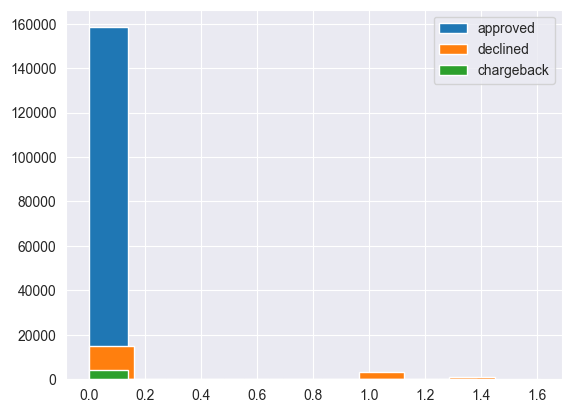

In [116]:
plt.hist(np.log(df[df.status == 'approved']['V8_ip']+1), label='approved')
plt.hist(np.log(df[df.status == 'declined']['V8_ip']+1), label='declined')
plt.hist(np.log(df[df.status == 'chargeback']['V8_ip']+1), label='chargeback')
plt.legend()
plt.show()

In [117]:
# is there a connection between IP address risk score and shipping method/shipping country and avg total_spent_USD?

# for higher risk scores (around 3-4) what are the most frequent countries?
df[df.V8_ip >= 3].groupby('shipping_country_clean')['order_id'].nunique()

shipping_country_clean
AE      1
AL      9
AT      5
AU     20
BE      4
     ... 
TW      3
UA      1
UK      1
US    667
ZA      1
Name: order_id, Length: 69, dtype: int64

higher risk scores belong to western countries like:
- US
- CA
- GB
- DE
- FR


In [118]:
df[df.V8_ip >= 3].groupby(['shipping_method','shipping_country_clean'])['order_id'].nunique()

shipping_method  shipping_country_clean
value_1059       US                        276
value_1101       US                          1
value_1108       AU                          1
                 ZA                          1
value_1134       PH                          1
                                          ... 
value_906        US                          1
value_914        US                          1
value_943        US                          2
value_977        MA                          1
value_996        US                          1
Name: order_id, Length: 382, dtype: int64

high IPs risk scores are linked to 3 shipping methods:
- value_1059
- value_434
- value_1273
which all deliver to US.


In [119]:
# is there a correlation between IP risk score and total_spent_USD? no it doesn't seem to be.
df[['V8_ip','total_spent_USD']].corr()

,V8_ip,total_spent_USD
V8_ip,1.000000,0.045617
total_spent_USD,0.045617,1.000000


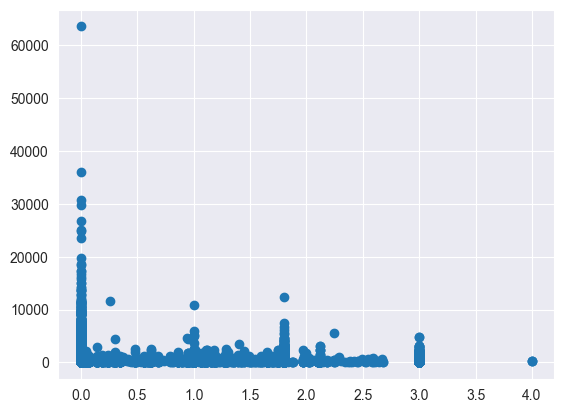

In [120]:
plt.scatter(df['V8_ip'], df['total_spent_USD'])
plt.show()

In [122]:
df[['V9_cookie','V10_cookie','V11_cookie']].corr()

,V9_cookie,V10_cookie,V11_cookie
V9_cookie,1.000000,-0.037776,0.255656
V10_cookie,-0.037776,1.000000,-0.124429
V11_cookie,0.255656,-0.124429,1.000000


In [ ]:
import seaborn as sns
sns.pairplot(df[['V9_cookie', 'V10_cookie', 'V11_cookie', 'status']], hue='status', palette={'approved': 'blue', 'chargeback': 'red', 'declined': 'orange'})
plt.show()

the categories overlap in each plot, so that it's a bit hard to use v9, v10, v11 to discriminate between the 3 classes.

## Examples of segments with sub-optimal performance (e.g. segments where they could safely approve more than they currently are)

To understand which segments could have safely been approved, I want to see if there are some profiles shared by approved and declined orders. Basically what we're trying to do here is to isolate the FN, meaning transactions that were potentially legitimate (their real label was positive) but that were blocked by the merchant's model (prediction was negative) by looking at common profiles between approved and declined transactions.



In [174]:
df_approved = df[df.status == 'approved']
df_declined = df[df.status == 'declined']

In [184]:
columns_suboptimal = ['shipping_method','currency_code','gateway','V1_link','V6_avs_result', 'V7_bill_ship_name_match','email_domain','email_address_count','season', 'is_weekend', 'billing_region','shipping_region']

# [total_spent_USD, 'V2_distance', 'V3_distance','V4_our_age','V5_merchant_age', V8_ip, V9_cookie, V10_cookie, V11_cookie]

In [185]:
df_approved_aggregate = df_approved.groupby(columns_suboptimal, as_index=False).agg(avg_total_spent_USD=('total_spent_USD','mean'))


In [186]:
df_declined_aggregate = df_declined.groupby(columns_suboptimal, as_index=False).agg(avg_total_spent_USD=('total_spent_USD','mean'))


To isolate FN, I will look at declined segments with high average total_spend_USD and see if we find a subset of features with the same values in the table of approved transactions.

In [187]:
df_declined_aggregate.sort_values(by=['avg_total_spent_USD'], ascending=False, inplace=True)

In [189]:
def find_common_segments_optimized(df_declined_aggregate, df_approved_aggregate, columns_suboptimal):
    """
    Optimized approach to find common segments between declined and approved datasets.

    Parameters:
        df_declined_aggregate (pd.DataFrame): Declined aggregated dataframe.
        df_approved_aggregate (pd.DataFrame): Approved aggregated dataframe.
        columns_suboptimal (list): List of columns to consider.

    Returns:
        list: List of common segments with feature combinations.
    """
    # Perform an inner join using all columns in columns_suboptimal
    merged = pd.merge(
        df_declined_aggregate[columns_suboptimal],
        df_approved_aggregate[columns_suboptimal],
        on=columns_suboptimal,
        how='inner'
    )

    # Sort the merged dataframe by the specificity of matches (most specific first)
    merged = merged.drop_duplicates().sort_values(by=columns_suboptimal)

    # Track segments that are specific and exclude redundant ones
    common_segments = []
    seen_segments = set()

    for _, row in merged.iterrows():
        segment = tuple((col, row[col]) for col in columns_suboptimal if pd.notnull(row[col]))

        # If no broader segment exists, add this one
        if not any(set(segment).issubset(set(existing)) for existing in seen_segments):
            common_segments.append(dict(segment))
            seen_segments.add(segment)

    return common_segments

segments = find_common_segments_optimized(df_declined_aggregate, df_approved_aggregate, columns_suboptimal)

segments_df = pd.DataFrame(segments)

In [190]:
segments_df.shape, segments_df.drop_duplicates().shape

((3738, 12), (3738, 12))

To see which segments should have been approved - I look at the common categorical combinations between approved and declines:

In [191]:
segments_df.head()

,shipping_method,currency_code,gateway,V1_link,V6_avs_result,V7_bill_ship_name_match,email_domain,email_address_count,season,is_weekend,billing_region,shipping_region
0,value_103,USD,value_196,False,Missing,FL,gmail,1,Winter,False,Europe,Europe
1,value_103,USD,value_196,False,Missing,FL,hotmail,1,Winter,True,Europe,Europe
2,value_1039,GBP,value_196,False,Missing,FL,gmail,1,Spring,False,Europe,Europe
3,value_105,USD,value_169,False,Missing,FL,personal_domain,1,Winter,True,Europe,Europe
4,value_1056,MXN,value_85,False,Missing,FL,gmail,1,Fall,False,North America,North America


In [194]:
def calculate_declined_metrics(segments_df, df_declined_aggregate, columns_suboptimal):
    """
    Calculate the number of declined orders and total spent for each segment.

    Parameters:
        segments_df (pd.DataFrame): DataFrame of identified segments.
        df_declined_aggregate (pd.DataFrame): Declined aggregated DataFrame.
        columns_suboptimal (list): List of columns to consider for the join.

    Returns:
        pd.DataFrame: Segments DataFrame with declined order counts and total spent.
    """
    # Perform a left join to find matching declined orders for each segment
    merged = pd.merge(
        segments_df,
        df_declined,
        on=columns_suboptimal,
        how='left'
    )

    # Group by the segment columns and calculate metrics
    metrics = merged.groupby(columns_suboptimal).agg(
        declined_order_count=('order_id', 'nunique'),
        total_declined_spent=('total_spent_USD', 'sum'),
        avg_declined_spent=('total_spent_USD', 'mean')
    ).reset_index()

    # Merge metrics back with the segments DataFrame
    result = pd.merge(segments_df, metrics, on=columns_suboptimal, how='left')

    return result

segments_with_metrics = calculate_declined_metrics(segments_df, df_declined_aggregate, columns_suboptimal)



Segments with declined metrics:
     shipping_method currency_code    gateway  V1_link V6_avs_result  \
0          value_103           USD  value_196    False       Missing   
1          value_103           USD  value_196    False       Missing   
2         value_1039           GBP  value_196    False       Missing   
3          value_105           USD  value_169    False       Missing   
4         value_1056           MXN   value_85    False       Missing   
...              ...           ...        ...      ...           ...   
3733       value_964           USD   value_47    False   Unsupported   
3734       value_985           USD  value_249    False       Missing   
3735       value_996           USD  value_205    False    Full Match   
3736       value_998           USD  value_201    False   Unsupported   
3737       value_999           USD  value_196    False    Full Match   

     V7_bill_ship_name_match     email_domain  email_address_count  season  \
0                        

In [203]:
segments_with_metrics

,shipping_method,currency_code,gateway,V1_link,V6_avs_result,V7_bill_ship_name_match,email_domain,email_address_count,season,is_weekend,billing_region,shipping_region,declined_order_count,total_declined_spent,avg_declined_spent
0,value_103,USD,value_196,False,Missing,FL,gmail,1,Winter,False,Europe,Europe,1,120.000000,120.000000
1,value_103,USD,value_196,False,Missing,FL,hotmail,1,Winter,True,Europe,Europe,1,155.000000,155.000000
2,value_1039,GBP,value_196,False,Missing,FL,gmail,1,Spring,False,Europe,Europe,1,83.184687,83.184687
3,value_105,USD,value_169,False,Missing,FL,personal_domain,1,Winter,True,Europe,Europe,1,145.000000,145.000000
4,value_1056,MXN,value_85,False,Missing,FL,gmail,1,Fall,False,North America,North America,1,6.672841,6.672841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,value_964,USD,value_47,False,Unsupported,FL,gmail,1,Summer,False,North America,North America,1,121.960000,121.960000
3734,value_985,USD,value_249,False,Missing,FL,gmail,1,Winter,False,Asia,Asia,1,315.600000,315.600000
3735,value_996,USD,value_205,False,Full Match,FL,gmail,1,Summer,False,North America,North America,1,203.250000,203.250000
3736,value_998,USD,value_201,False,Unsupported,FL,gmail,1,Winter,False,North America,North America,1,190.500000,190.500000


In [206]:
top5_segments_frequency = segments_with_metrics.sort_values(by=['declined_order_count'], ascending=False).head(5)
top5_segments_frequency

,shipping_method,currency_code,gateway,V1_link,V6_avs_result,V7_bill_ship_name_match,email_domain,email_address_count,season,is_weekend,billing_region,shipping_region,declined_order_count,total_declined_spent,avg_declined_spent
296,value_1059,USD,value_245,False,Unsupported,FL,GMAIL,1,Winter,False,North America,North America,106,28996.70,273.553774
352,value_1059,USD,value_245,False,Unsupported,FL,qq,1,Spring,False,North America,North America,97,47374.58,488.397732
292,value_1059,USD,value_245,False,Unsupported,FL,GMAIL,1,Spring,False,North America,North America,91,31348.91,344.493516
286,value_1059,USD,value_245,False,Unsupported,FL,163,1,Winter,False,North America,North America,86,46675.99,542.744070
239,value_1059,USD,value_245,False,No Match,FL,gmail,1,Spring,False,North America,North America,76,10549.09,138.803816


In [207]:
top5_segments_frequency.groupby(['shipping_method', 'currency_code','gateway','V1_link','V7_bill_ship_name_match', 'email_address_count','is_weekend','billing_region','shipping_region'], as_index=False).agg(total_declined=('declined_order_count', 'sum'), total_declined_spent=('total_declined_spent', 'sum'))

,shipping_method,currency_code,gateway,V1_link,V7_bill_ship_name_match,email_address_count,is_weekend,billing_region,shipping_region,total_declined,total_declined_spent
0,value_1059,USD,value_245,False,FL,1,False,North America,North America,456,164945.27


In [205]:
top5_segments_cost = segments_with_metrics.sort_values(by=['total_declined_spent'], ascending=False).head(5)
top5_segments_cost

,shipping_method,currency_code,gateway,V1_link,V6_avs_result,V7_bill_ship_name_match,email_domain,email_address_count,season,is_weekend,billing_region,shipping_region,declined_order_count,total_declined_spent,avg_declined_spent
352,value_1059,USD,value_245,False,Unsupported,FL,qq,1,Spring,False,North America,North America,97,47374.580000,488.397732
286,value_1059,USD,value_245,False,Unsupported,FL,163,1,Winter,False,North America,North America,86,46675.990000,542.744070
282,value_1059,USD,value_245,False,Unsupported,FL,163,1,Spring,False,North America,North America,74,39501.310000,533.801486
1289,value_1620,USD,value_201,False,Full Match,FL,personal_domain,1,Spring,False,North America,North America,5,38003.680000,7600.736000
658,value_1273,EUR,value_11,False,Unsupported,FL,gmail,1,Winter,False,Europe,Europe,23,32225.550836,1401.110906


In [209]:
top5_segments_cost.columns

Index(['shipping_method', 'currency_code', 'gateway', 'V1_link',
       'V6_avs_result', 'V7_bill_ship_name_match', 'email_domain',
       'email_address_count', 'season', 'is_weekend', 'billing_region',
       'shipping_region', 'declined_order_count', 'total_declined_spent',
       'avg_declined_spent'],
      dtype='object')

In [218]:
top5_segments_frequency.columns

Index(['shipping_method', 'currency_code', 'gateway', 'V1_link',
       'V6_avs_result', 'V7_bill_ship_name_match', 'email_domain',
       'email_address_count', 'season', 'is_weekend', 'billing_region',
       'shipping_region', 'declined_order_count', 'total_declined_spent',
       'avg_declined_spent', 'profile'],
      dtype='object')

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/2988331005.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


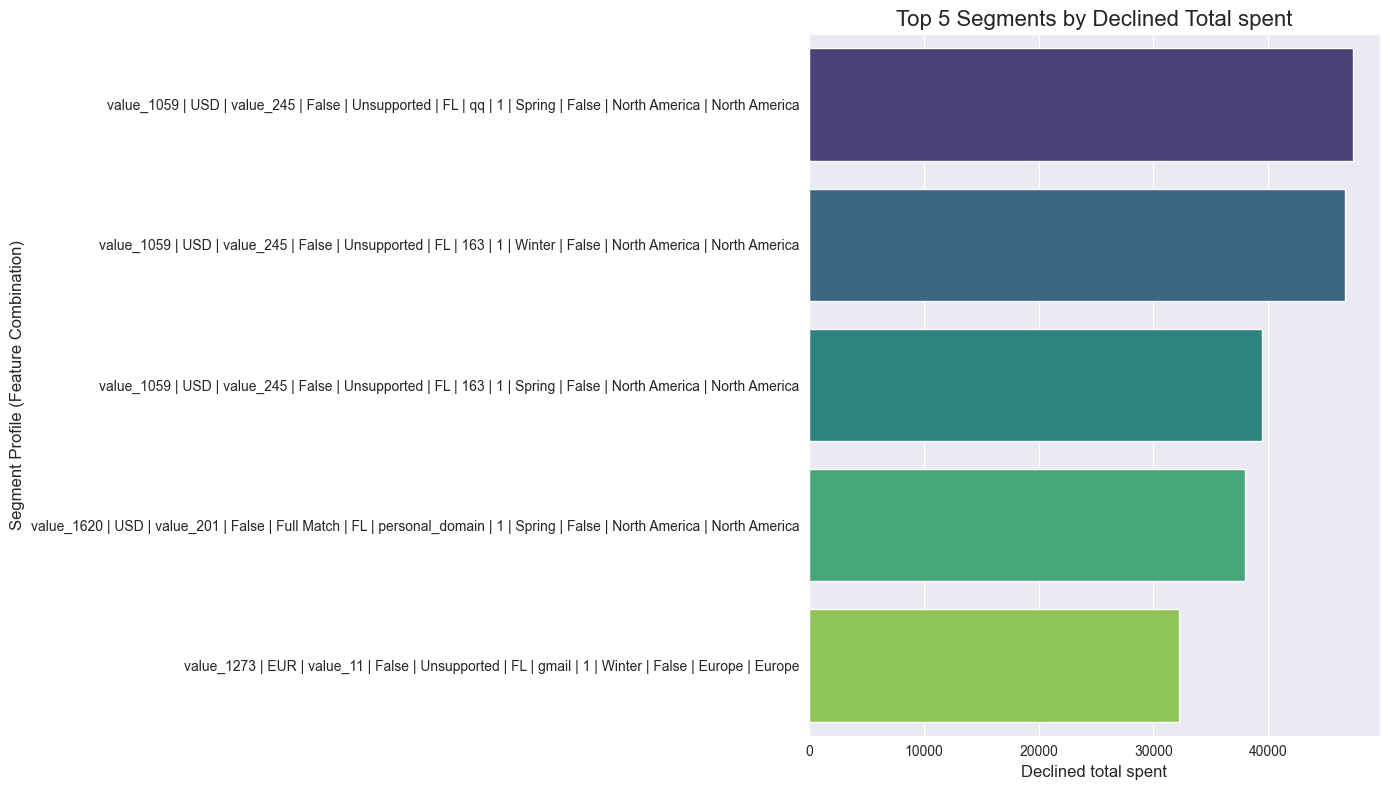

In [224]:


def plot_top_5_segments_with_metrics(top5_segments_frequency):
    """
    Plot the top 5 segments with their profiles and attach declined order count and total declined spent to the bars.

    Parameters:
        top5_segments_frequency (pd.DataFrame): DataFrame containing the top 5 segments with metrics.
    """
    # Convert boolean columns to strings if necessary
    for col in top5_segments_frequency.columns:
        if top5_segments_frequency[col].dtype == 'bool':
            top5_segments_frequency[col] = top5_segments_frequency[col].astype(str)

    # Create a new column to represent the profile as a single label
    top5_segments_frequency['profile'] = (
        top5_segments_frequency['shipping_method'] + " | " +
        top5_segments_frequency['currency_code'] + " | " +
        top5_segments_frequency['gateway'] + " | " +
        top5_segments_frequency['V1_link'] + " | " +
        top5_segments_frequency['V6_avs_result'] + " | " +
        top5_segments_frequency['V7_bill_ship_name_match'] + " | " +
        top5_segments_frequency['email_domain'] + " | " +
        top5_segments_frequency['email_address_count'].astype(str) + " | " +
        top5_segments_frequency['season'] + " | " +
        top5_segments_frequency['is_weekend'].astype(str) + " | " +
        top5_segments_frequency['billing_region'] + " | " +
        top5_segments_frequency['shipping_region']
    )

    # Plot the bar chart
    plt.figure(figsize=(14, 8))
    sns.barplot(
        data=top5_segments_frequency,
        x='total_declined_spent',
        y='profile',
        palette='viridis'
    )

    # # Add declined order count and total declined spent as text labels near the bars
    # for i, row in top5_segments_frequency.iterrows():
    #     plt.text(
    #         row['declined_order_count'] + 0.1,  # x-coordinate
    #         i,  # y-coordinate
    #         f"{row['declined_order_count']} orders",  # text
    #         color='black',
    #         va='center',
    #         fontsize=10
    #     )

    # Add labels and title
    plt.title('Top 5 Segments by Declined Total spent', fontsize=16)
    plt.xlabel('Declined total spent', fontsize=12)
    plt.ylabel('Segment Profile (Feature Combination)', fontsize=12)
    plt.tight_layout()
    plt.savefig('top5_segments_declined_spent.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

# Assuming top5_segments_frequency is a DataFrame with the required columns
# Replace it with your actual DataFrame containing the necessary data
plot_top_5_segments_with_metrics(top5_segments_cost)

2. Train a predictive model. Based on this model, prepare a short report to send to the sales team explaining the expected performance of the model. The sales team requests an approval rate of 90%

In [228]:
df.head()

,order_id,status,email_anoni,billing_country_code,shipping_country_code,shipping_method,created_at,total_spent,currency_code,gateway,...,V5_merchant_age_log,V4_our_age_log,V2_distance_cat,V3_distance_cat,V4_our_age_cat,V5_merchant_age_cat,V8_ip_cat,V9_cookie_cat,V10_cookie_cat,V11_cookie_cat
0,176079577,approved,shRbsUOPGM@qq.com,CA,CA,value_1620,2017-04-06,758.471274,CAD,value_100,...,0.693147,6.428105,NaN,NaN,senior,established,no risk,low,low,NaN
1,201560820,approved,hEjasTK8Vpq6sR@gmail.com,IT,IT,value_1639,2017-06-16,48.319175,EUR,value_169,...,0.000000,0.000000,very low,very low,child,new,no risk,low,low,NaN
2,164072492,approved,KOWpxkDYDF@gmail.com,BE,BE,value_244,2017-03-01,1123.094534,EUR,value_151,...,7.271009,7.047517,medium,low,senior,veteran,no risk,low,low,low
3,174595495,approved,hKOMNS3@me.com,CH,CH,value_1879,2017-04-02,12.530000,USD,value_247,...,4.290459,5.135798,very low,very low,senior,veteran,no risk,medium,low,low
4,213517818,approved,PrP6SYm5Q5nMs1tj@hotmail.com,HK,HK,value_291,2017-07-11,480.000000,USD,value_148,...,6.253829,6.693324,very low,very low,senior,veteran,no risk,high,low,low


In [229]:
# For this part - i will create some categorical columns for V2_distance, V3_distance, V4_our_age, V5_merchant_age, V8_ip, V9_cookie, V10_cookie, V11_cookie.

df[['V2_distance', 'V3_distance', 'V4_our_age', 'V5_merchant_age', 'V8_ip', 'V9_cookie', 'V10_cookie', 'V11_cookie']].describe()

,V2_distance,V3_distance,V4_our_age,V5_merchant_age,V8_ip,V9_cookie,V10_cookie,V11_cookie
count,157964.000000,158957.000000,189993.000000,189993.000000,185132.000000,189816.000000,188148.000000,111295.000000
mean,1176.859443,1262.328208,653.947451,216.220645,0.076579,82.207796,5.305185,47.386270
std,3088.102927,3206.620899,2046.051781,6976.480661,0.387298,589.419776,9.227724,114.170882
min,0.000000,0.000000,0.000000,-323.000000,0.000000,0.000000,0.000000,-140.884769
25%,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.631284,0.016134
50%,13.000000,13.000000,51.000000,1.000000,0.000000,4.000000,1.533317,1.773900
75%,174.000000,198.000000,692.000000,82.000000,0.000000,18.000000,4.443918,36.878183
max,19610.000000,19610.000000,730603.000000,736666.000000,4.000000,24260.000000,100.000000,1181.605035


In [230]:
def transform_to_categorical(df):
    """
    Transform numerical features into categorical with 3-4 categories each.

    Parameters:
        df (pd.DataFrame): Input DataFrame with numerical features.

    Returns:
        pd.DataFrame: DataFrame with updated categorical columns.
    """
    # V2_distance and V3_distance
    bins_distance = [0, 10, 100, 1000, 10000, np.inf]
    labels_distance = ['very low', 'low', 'medium', 'high', 'very high']
    df['V2_distance_cat'] = pd.cut(df['V2_distance'], bins=bins_distance, labels=labels_distance, right=False)
    df['V3_distance_cat'] = pd.cut(df['V3_distance'], bins=bins_distance, labels=labels_distance, right=False)

    # V4_our_age
    bins_age = [0, 18, 35, 60, np.inf]
    labels_age = ['child', 'young adult', 'adult', 'senior']
    df['V4_our_age_cat'] = pd.cut(df['V4_our_age'], bins=bins_age, labels=labels_age, right=False)

    # V5_merchant_age
    bins_merchant_age = [-np.inf, 0, 1, 10, 50, np.inf]
    labels_merchant_age = ['negative_age', 'new', 'established', 'experienced', 'veteran']
    df['V5_merchant_age_cat'] = pd.cut(df['V5_merchant_age'], bins=bins_merchant_age, labels=labels_merchant_age, right=False)

    # V8_ip
    bins_ip = [0, 1, 3, np.inf]
    labels_ip = ['no risk', 'moderate risk', 'high risk']
    df['V8_ip_cat'] = pd.cut(df['V8_ip'], bins=bins_ip, labels=labels_ip, right=False)

    # V9_cookie
    bins_cookie = [0, 4, 18, np.inf]
    labels_cookie = ['low', 'medium', 'high']
    df['V9_cookie_cat'] = pd.cut(df['V9_cookie'], bins=bins_cookie, labels=labels_cookie, right=False)

    # V10_cookie
    bins_cookie_10 = [0, 10, 50, np.inf]
    labels_cookie_10 = ['low', 'medium', 'high']
    df['V10_cookie_cat'] = pd.cut(df['V10_cookie'], bins=bins_cookie_10, labels=labels_cookie_10, right=False)

    # V11_cookie
    bins_cookie_11 = [-np.inf, 0, 100, 500, np.inf]
    labels_cookie_11 = ['negative', 'low', 'medium', 'high']
    df['V11_cookie_cat'] = pd.cut(df['V11_cookie'], bins=bins_cookie_11, labels=labels_cookie_11, right=False)

    return df

In [231]:
df = transform_to_categorical(df)

In [232]:
df_model = df[df.status != 'declined']
df_model['label'] = np.where(df_model['status']=='approved',1,0)


/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/2018074920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['label'] = np.where(df_model['status']=='approved',1,0)


In [233]:
df_model.head()

,order_id,status,email_anoni,billing_country_code,shipping_country_code,shipping_method,created_at,total_spent,currency_code,gateway,...,V4_our_age_log,V2_distance_cat,V3_distance_cat,V4_our_age_cat,V5_merchant_age_cat,V8_ip_cat,V9_cookie_cat,V10_cookie_cat,V11_cookie_cat,label
0,176079577,approved,shRbsUOPGM@qq.com,CA,CA,value_1620,2017-04-06,758.471274,CAD,value_100,...,6.428105,NaN,NaN,senior,established,no risk,low,low,NaN,1
1,201560820,approved,hEjasTK8Vpq6sR@gmail.com,IT,IT,value_1639,2017-06-16,48.319175,EUR,value_169,...,0.000000,very low,very low,child,new,no risk,low,low,NaN,1
2,164072492,approved,KOWpxkDYDF@gmail.com,BE,BE,value_244,2017-03-01,1123.094534,EUR,value_151,...,7.047517,medium,low,senior,veteran,no risk,low,low,low,1
3,174595495,approved,hKOMNS3@me.com,CH,CH,value_1879,2017-04-02,12.530000,USD,value_247,...,5.135798,very low,very low,senior,veteran,no risk,medium,low,low,1
4,213517818,approved,PrP6SYm5Q5nMs1tj@hotmail.com,HK,HK,value_291,2017-07-11,480.000000,USD,value_148,...,6.693324,very low,very low,senior,veteran,no risk,high,low,low,1


In [235]:
df_model.columns

Index(['order_id', 'status', 'email_anoni', 'billing_country_code',
       'shipping_country_code', 'shipping_method', 'created_at', 'total_spent',
       'currency_code', 'gateway', 'V1_link', 'V2_distance', 'V3_distance',
       'V4_our_age', 'V5_merchant_age', 'V6_avs_result',
       'V7_bill_ship_name_match', 'V8_ip', 'V9_cookie', 'V10_cookie',
       'V11_cookie', 'email_domain', 'email_address_count', 'year', 'month',
       'season', 'day_of_week', 'is_weekend', 'billing_country_clean',
       'shipping_country_clean', 'total_spent_USD', 'log(total_spent_USD+1)',
       'billing_region', 'shipping_region', 'billing_shipping_mismatch',
       'V2_distance>V3_distance', 'V2_V3_avg_distance', 'V2_V3_interaction',
       'V4_our_age>V5_merchant_age', 'V5_merchant_age_log_shift',
       'V5_merchant_age_log', 'V4_our_age_log', 'V2_distance_cat',
       'V3_distance_cat', 'V4_our_age_cat', 'V5_merchant_age_cat', 'V8_ip_cat',
       'V9_cookie_cat', 'V10_cookie_cat', 'V11_cookie_cat', 

In [240]:
baseline_columns = ['shipping_method',
       'currency_code', 'gateway', 'V1_link', 'V2_distance', 'V3_distance',
       'V4_our_age', 'V5_merchant_age', 'V6_avs_result',
       'V7_bill_ship_name_match', 'V8_ip', 'V9_cookie', 'V10_cookie',
       'V11_cookie', 'email_domain', 'year', 'month',
       'season', 'day_of_week', 'is_weekend', 'billing_country_clean',
       'shipping_country_clean', 'total_spent_USD','label']

In [243]:
df_model.drop_duplicates()['label'].value_counts()/df_model.drop_duplicates()['label'].value_counts().sum()

label
1    0.973182
0    0.026818
Name: count, dtype: float64

In [249]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, confusion_matrix

categorical_columns = [
    'shipping_method', 'currency_code', 'gateway', 'V1_link', 'V6_avs_result',
    'V7_bill_ship_name_match', 'email_domain', 'year', 'month', 'season', 'day_of_week', 'is_weekend',
    'billing_country_clean', 'shipping_country_clean'
]

# Split into train-dev-test sets
target_column = 'label'
data = df_model[baseline_columns]

# Convert categorical columns and NaN values to strings
for col in categorical_columns:
    data[col] = data[col].astype(str)

train_dev_data, test_data = train_test_split(data, test_size=0.03, random_state=42, stratify=data[target_column])
train_data, dev_data = train_test_split(train_dev_data, test_size=0.2, random_state=42, stratify=train_dev_data[target_column])

# Separate features and target
X_train, y_train = train_data.drop(columns=[target_column]), train_data[target_column]
X_dev, y_dev = dev_data.drop(columns=[target_column]), dev_data[target_column]
X_test, y_test = test_data.drop(columns=[target_column]), test_data[target_column]

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/1190873720.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(str)
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/1190873720.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(str)
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/1190873720.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [250]:
X_train

,shipping_method,currency_code,gateway,V1_link,V2_distance,V3_distance,V4_our_age,V5_merchant_age,V6_avs_result,V7_bill_ship_name_match,...,V11_cookie,email_domain,year,month,season,day_of_week,is_weekend,billing_country_clean,shipping_country_clean,total_spent_USD
86460,value_291,USD,value_172,False,6.0,6.0,1249.0,1107.0,Missing,F,...,562.050417,personal_domain,2017,6,Summer,Saturday,True,TW,TW,805.000000
144467,value_2132,EUR,value_21,False,585.0,3.0,0.0,1.0,Unsupported,NO_MATCH,...,0.018727,outlook,2016,11,Fall,Monday,False,FR,FR,167.876636
59261,value_1609,GBP,value_4,False,7.0,12.0,5015.0,1622.0,Missing,FL,...,76.564306,yahoo,2017,5,Spring,Sunday,True,GB,GB,101.843405
110167,value_1938,USD,value_21,False,7.0,7.0,0.0,1.0,Full Match,FL,...,0.019803,personal_domain,2017,6,Summer,Thursday,False,CA,CA,183.000000
122745,value_1645,USD,value_65,False,NaN,NaN,0.0,0.0,Full Match,FL,...,NaN,live,2017,5,Spring,Saturday,True,US,US,44.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37096,value_2127,GBP,value_43,False,4.0,4.0,0.0,1.0,Unsupported,FL,...,NaN,personal_domain,2017,6,Summer,Thursday,False,HU,HU,195.616021
69874,value_1639,EUR,value_65,False,6.0,6.0,0.0,1.0,Unsupported,FL,...,NaN,web,2016,11,Fall,Wednesday,False,DE,DE,97.533333
184446,value_1301,BRL,value_4,False,3.0,3.0,0.0,0.0,Unsupported,FL,...,0.009228,gmail,2017,3,Spring,Monday,False,BR,BR,59.262988
143888,value_1619,GBP,value_169,False,10.0,1.0,0.0,1.0,Missing,L,...,0.008484,personal_domain,2017,2,Winter,Wednesday,False,UK,UK,122.461069


In [279]:

# Initialize CatBoost Classifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.07,
    depth=6,
    eval_metric='Recall',
    cat_features=categorical_columns,
    class_weights=[1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])],  # Handle class imbalance
    verbose=100
)

# Train the model
model.fit(X_train, y_train, eval_set=(X_dev, y_dev), early_stopping_rounds=50)

0:	learn: 0.7576685	test: 0.7594093	best: 0.7594093 (0)	total: 136ms	remaining: 2m 16s
100:	learn: 0.8723108	test: 0.8700461	best: 0.8702642 (99)	total: 14.9s	remaining: 2m 12s
200:	learn: 0.8877880	test: 0.8834123	best: 0.8834123 (200)	total: 25.6s	remaining: 1m 41s
300:	learn: 0.8980620	test: 0.8916064	best: 0.8916064 (299)	total: 34.8s	remaining: 1m 20s
400:	learn: 0.9068094	test: 0.8995202	best: 0.8995202 (399)	total: 43.9s	remaining: 1m 5s
500:	learn: 0.9134770	test: 0.9073405	best: 0.9074028 (499)	total: 53.2s	remaining: 53s
600:	learn: 0.9204717	test: 0.9146623	best: 0.9146934 (599)	total: 1m 2s	remaining: 41.4s
700:	learn: 0.9262903	test: 0.9206132	best: 0.9206132 (700)	total: 1m 11s	remaining: 30.4s
800:	learn: 0.9315325	test: 0.9246947	best: 0.9247570 (798)	total: 1m 20s	remaining: 19.9s
900:	learn: 0.9361749	test: 0.9284334	best: 0.9284334 (900)	total: 1m 29s	remaining: 9.8s
999:	learn: 0.9401240	test: 0.9318918	best: 0.9319853 (995)	total: 1m 38s	remaining: 0us

bestTest = 

In [289]:

# check on train set
train_preds = model.predict(X_train)
train_recall = recall_score(y_train, train_preds)
conf_matrix = confusion_matrix(y_train, train_preds)
tn, fp, fn, tp = conf_matrix.ravel()
train_approval_rate = (tp+fp)/(tp+tn+fp+fn)
chargeback_rate_train = fp/(tp+fp)
# Display metrics
print("Train Metrics:")
print(f"  Recall: {train_recall:.4f}")
print(f"  Approval Rate: {train_approval_rate:.4f}")
print(f"  Chargeback Rate: {chargeback_rate_train:.4f}")


# Evaluate on dev set
dev_preds = model.predict(X_dev)
dev_recall = recall_score(y_dev, dev_preds)
conf_matrix = confusion_matrix(y_dev, dev_preds)
tn, fp, fn, tp = conf_matrix.ravel()
dev_approval_rate = (tp+fp)/(tp+tn+fp+fn)
chargeback_rate_dev = fp/(tp+fp)
# Display metrics
print("Validation Metrics:")
print(f"  Recall: {dev_recall:.4f}")
print(f"  Approval Rate: {dev_approval_rate:.4f}")
print(f"  Chargeback Rate: {chargeback_rate_dev:.4f}")


Train Metrics:
  Recall: 0.9400
  Approval Rate: 0.9152
  Chargeback Rate: 0.0005
Validation Metrics:
  Recall: 0.9320
  Approval Rate: 0.9129
  Chargeback Rate: 0.0065


The model does not overfit as the distance between train recall and validation recall is around 1%

In [290]:
test_preds = model.predict(X_test)
test_recall = recall_score(y_test, test_preds)
conf_matrix = confusion_matrix(y_test, test_preds)
tn, fp, fn, tp = conf_matrix.ravel()
test_approval_rate = (tp+fp)/(tp+tn+fp+fn)
chargeback_rate_test = fp/(tp+fp)
# Display metrics
print("Test Metrics:")
print(f"  Recall: {test_recall:.4f}")
print(f"  Approval Rate: {test_approval_rate:.4f}")
print(f"  Chargeback Rate: {chargeback_rate_test:.4f}")

Test Metrics:
  Recall: 0.9293
  Approval Rate: 0.9104
  Chargeback Rate: 0.0067


In [282]:
declined_test = df_declined[['shipping_method',
       'currency_code', 'gateway', 'V1_link', 'V2_distance', 'V3_distance',
       'V4_our_age', 'V5_merchant_age', 'V6_avs_result',
       'V7_bill_ship_name_match', 'V8_ip', 'V9_cookie', 'V10_cookie',
       'V11_cookie', 'email_domain', 'year', 'month',
       'season', 'day_of_week', 'is_weekend', 'billing_country_clean',
       'shipping_country_clean', 'total_spent_USD']]

categorical_columns = [
    'shipping_method', 'currency_code', 'gateway', 'V1_link', 'V6_avs_result',
    'V7_bill_ship_name_match', 'email_domain', 'year', 'month', 'season', 'day_of_week', 'is_weekend',
    'billing_country_clean', 'shipping_country_clean'
]

# Convert categorical columns and NaN values to strings
for col in categorical_columns:
    declined_test[col] = declined_test[col].astype(str)

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/3777649377.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  declined_test[col] = declined_test[col].astype(str)
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/3777649377.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  declined_test[col] = declined_test[col].astype(str)
/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/3777649377.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [283]:
decline_preds = model.predict(declined_test)

In [284]:
df_declined['predictions'] = decline_preds

/var/folders/tz/4zg0f6x90m7cbq4q1p10p1m40000gn/T/ipykernel_2314/735159950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_declined['predictions'] = decline_preds


In [285]:
df_declined.columns

Index(['order_id', 'status', 'email_anoni', 'billing_country_code',
       'shipping_country_code', 'shipping_method', 'created_at', 'total_spent',
       'currency_code', 'gateway', 'V1_link', 'V2_distance', 'V3_distance',
       'V4_our_age', 'V5_merchant_age', 'V6_avs_result',
       'V7_bill_ship_name_match', 'V8_ip', 'V9_cookie', 'V10_cookie',
       'V11_cookie', 'email_domain', 'email_address_count', 'year', 'month',
       'season', 'day_of_week', 'is_weekend', 'billing_country_clean',
       'shipping_country_clean', 'total_spent_USD', 'log(total_spent_USD+1)',
       'billing_region', 'shipping_region', 'billing_shipping_mismatch',
       'V2_distance>V3_distance', 'V2_V3_avg_distance', 'V2_V3_interaction',
       'V4_our_age>V5_merchant_age', 'V5_merchant_age_log_shift',
       'V5_merchant_age_log', 'V4_our_age_log', 'V2_distance_cat',
       'V3_distance_cat', 'V4_our_age_cat', 'V5_merchant_age_cat', 'V8_ip_cat',
       'V9_cookie_cat', 'V10_cookie_cat', 'V11_cookie_cat', 

In [288]:
df_declined[df_declined.predictions == 1].groupby(['shipping_method', 'currency_code','gateway','V1_link','V6_avs_result','V7_bill_ship_name_match', 'email_domain','email_address_count','season','is_weekend','billing_region'], as_index=False).agg(total_declined=('order_id', 'nunique'), total_declined_spent=('total_spent_USD', 'sum')).sort_values(by=['total_declined_spent'], ascending=False)

,shipping_method,currency_code,gateway,V1_link,V6_avs_result,V7_bill_ship_name_match,email_domain,email_address_count,season,is_weekend,billing_region,total_declined,total_declined_spent
660,value_1059,USD,value_245,False,Unsupported,FL,qq,1,Spring,False,North America,96,46735.62
566,value_1059,USD,value_245,False,Unsupported,FL,163,1,Winter,False,North America,86,46675.99
562,value_1059,USD,value_245,False,Unsupported,FL,163,1,Spring,False,North America,74,39501.31
2359,value_1620,USD,value_201,False,Full Match,FL,personal_domain,1,Spring,False,North America,5,38003.68
4741,value_291,USD,value_181,False,Unsupported,FL,personal_domain,1,Spring,False,Middle East,1,24940.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,value_1137,USD,value_43,False,Other,FL,personal_domain,1,Fall,False,Europe,1,0.00
975,value_1137,USD,value_43,False,Unsupported,FL,gmail,1,Spring,False,Europe,1,0.00
977,value_1137,USD,value_43,False,Unsupported,FL,yahoo,1,Fall,False,Europe,1,0.00
5637,value_526,USD,value_43,False,Unsupported,FL,gmail,1,Summer,True,North America,1,0.00


We reached +90% in both recall and approval rate. in addition - we see that we the model predict for the declined orders, it successfully spots the FN by predicting 1 for those segments that demonstrated a suboptimal performance when we compared between declined and approved transactions.

In [ ]:
# split into train-dev-test
# PCA on V2 and V3 after splitting train, dev, test.
# there are some numeric features on different scale that are either very correlated or the feature is not interpretable so I can feed it to a PCA for dimensionality reduction after scaling.
# ASSUME THE MODEL IS REAL TIME - SO NUMBER OF EMAIL ADDRESSES PER ORDER_ID CANNOT BE USED. see which features are available in real time and which not.

# train-dev is approved+chargebacks
# test set is declined. if algo works well, the sub-optimal segments found in section 1 should be classified as positives.

# TUNING + FEATURE SELECTION + FEATURES DONT HAVE LEAKAGE BETWEEN TRAIN-DEV-TEST+ Q3

3. Based on the performance of the model you trained, what should be the fee that we should quote the merchant if we want the total cost of chargebacks to be 50% of our total revenue?

Solving for fee, the fee should be twice the total_spend_FP/total_spend_(TP+FP), and TP+FP are the total approved orders.

In [292]:
def calculate_fee(chargeback_cost, total_approved_volume):
    """
    Calculate the fee to ensure chargeback cost is 50% of total revenue.

    Parameters:
        chargeback_cost (float): Total spent on chargebacks.
        total_approved_volume (float): Total spent on approved orders.

    Returns:
        float: Fee to charge as a percentage of the approved volume.
    """
    if total_approved_volume == 0:
        return 0  # Avoid division by zero
    fee = 2 * (chargeback_cost / total_approved_volume)
    return fee

test_data['predictions'] = test_preds


In [299]:
chargeback_cost = test_data[(test_data.label==0) & (test_data.predictions == 1)]['total_spent_USD'].sum()
total_approved_volume = test_data[(test_data.predictions == 1)]['total_spent_USD'].sum()
calculate_fee(chargeback_cost=chargeback_cost, total_approved_volume=total_approved_volume)

0.01355175088616605

In [300]:
train_data['predictions'] = train_preds
chargeback_cost = train_data[(train_data.label==0) & (train_data.predictions == 1)]['total_spent_USD'].sum()
total_approved_volume = train_data[(train_data.predictions == 1)]['total_spent_USD'].sum()
calculate_fee(chargeback_cost=chargeback_cost, total_approved_volume=total_approved_volume)

0.0004841025291940218

In [303]:
dev_data['predictions'] = dev_preds
chargeback_cost = dev_data[(dev_data.label==0) & (dev_data.predictions == 1)]['total_spent_USD'].sum()
total_approved_volume = dev_data[(dev_data.predictions == 1)]['total_spent_USD'].sum()
calculate_fee(chargeback_cost=chargeback_cost, total_approved_volume=total_approved_volume)

0.022997747390208528